In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import hurst 
#from hurst import compute_Hc, random_walk
from itertools import combinations
import json
import requests
import time
import warnings
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
warnings.filterwarnings('ignore')

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()
#Speeding up the computation

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [20]:
da_1=pd.DataFrame()
symbols= ['BTC','UNI','SUSHI','CRV','SOL','MANA','COMP','DOGE','BAT','MATIC','ENJ','XMR','LINK','BCH','XLM','ADA','BNB','LTC','ETH']
for i in symbols:
    if(i==symbols[0]):
        da_1['Time']=pd.read_csv('C:\\Users\\91626\\Work\\project\\Quant Res\\Cluster\\data\\Binance\\'+i+'_USDT_5m.csv',index_col=False,names=['Time','Open','Close','Low','High'])['Time']
        
    da_1[i]=pd.read_csv('C:\\Users\\91626\\Work\\project\\Quant Res\\Cluster\\data\\Binance\\'+i+'_USDT_5m.csv',index_col=False,names=['Time','Open','Close','Low','High'])['Close']

In [21]:
import datetime
h=[]
for i in da_1['Time']:
    #print(i)
    h.append(datetime.datetime.fromtimestamp(i/1000).isoformat())
da_1['Time']=h

In [22]:
h=[]
for i in da_1['Time']:
    dt_string=str(i)
    format = "%Y-%m-%dT%H:%M:%S"
    h.append(datetime.datetime.strptime(dt_string, format))
da_1['Time']=h

In [23]:
da_1.set_index('Time',inplace=True)

In [24]:
pwd

'C:\\Users\\91626\\Work\\project\\Quant Res\\Cluster'

In [17]:
da_1.fillna(method='bfill',inplace=True)

In [166]:
data_store= da_1.to_csv('./b.csv')

In [164]:
pwd

'C:\\Users\\91626\\Work\\project\\Quant Res\\Cluster'

In [25]:
st = datetime.datetime(2021, 12, 10 , 0, 0)
en_mid = datetime.datetime(2022, 9, 10, 0, 0)
da1= da_1[st:en_mid]

In [204]:
#da_1.index[-1]
en_last= datetime.datetime(2022, 12, 13, 0, 0)

In [26]:
da1

,BTC,UNI,SUSHI,CRV,SOL,MANA,COMP,DOGE,BAT,MATIC,ENJ,XMR,LINK,BCH,XLM,ADA,BNB,LTC,ETH
Time,,,,,,,,,,,,,,,,,,,
2021-12-10 00:00:00,47885.90,16.43,5.616,3.754,181.06,3.5127,199.70,0.17190,1.1699,2.1160,2.6170,189.7,20.720,452.3,0.2789,1.3120,574.2,153.80,4139.99
2021-12-10 00:05:00,47843.07,16.42,5.615,3.755,180.99,3.5107,199.20,0.17130,1.1636,2.0950,2.5980,188.6,20.940,453.7,0.2795,1.3110,574.2,154.30,4150.62
2021-12-10 00:10:00,47778.01,16.37,5.576,3.734,180.73,3.4842,197.90,0.17050,1.1608,2.1020,2.6130,190.3,20.980,453.9,0.2798,1.3160,576.2,154.90,4143.60
2021-12-10 00:15:00,47773.87,16.28,5.551,3.710,179.70,3.4976,199.20,0.17150,1.1665,2.1140,2.6100,190.6,21.150,456.1,0.2788,1.3140,575.3,154.40,4142.87
2021-12-10 00:20:00,47686.85,16.35,5.572,3.736,180.68,3.5093,198.40,0.17160,1.1679,2.1350,2.6230,190.9,21.050,455.2,0.2783,1.3130,575.3,154.60,4150.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 23:40:00,21199.00,6.41,1.317,1.192,34.54,0.7989,51.09,0.06291,0.3463,0.8806,0.5386,156.5,7.699,132.3,0.1114,0.4916,290.6,60.98,1705.73
2022-09-09 23:45:00,21200.00,6.42,1.321,1.192,34.67,0.7975,51.06,0.06280,0.3458,0.8807,0.5380,156.4,7.702,132.0,0.1114,0.4918,290.6,60.97,1706.32
2022-09-09 23:50:00,21237.14,6.40,1.320,1.187,34.54,0.7975,51.01,0.06279,0.3465,0.8818,0.5384,156.1,7.701,132.0,0.1114,0.4915,290.2,60.90,1705.92


In [28]:
#Calculate average annual percentage return and volatilities
returns = pd.DataFrame(da1.pct_change().mean() * 365*12*24)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = da1.pct_change().std() * np.sqrt(365*12*24)
data=returns
data

,Returns,Volatility
BTC,-0.865357,0.665332
UNI,-0.639265,1.109281
SUSHI,-1.034397,1.340804
CRV,-0.648661,1.325442
SOL,-1.546824,1.149055
MANA,-1.338120,1.129835
COMP,-1.164101,1.143680
DOGE,-0.759200,1.082607
BAT,-1.079044,1.040865
MATIC,-0.557235,1.103356


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
X=rescaledDataset
X.head(2)


,Returns,Volatility
BTC,-0.010825,-1.901716
UNI,0.490538,0.301687


In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


## K-Means

In [31]:
from sklearn.cluster import KMeans
inertia=[]
seed=42

for k in tqdm(range(2,16)):#max loop=16
    kmeans= KMeans(n_clusters=k,random_state=seed,n_jobs=-1,verbose=True)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    #print(inertia[-1])

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 104.05it/s]

Initialization complete
Iteration 0, inertia 24.95488175308985.
Initialization complete
Iteration 1, inertia 25.246171698072075.
Initialization complete
Iteration 2, inertia 27.127875090415817.
Initialization complete
Iteration 3, inertia 22.589179948315603.
Initialization complete
Iteration 4, inertia 24.63669787221203.
Initialization complete
Iteration 5, inertia 24.63669787221203.
Initialization complete
Iteration 6, inertia 25.246171698072075.
Initialization complete
Iteration 7, inertia 22.589179948315603.
Initialization complete
Iteration 8, inertia 24.63669787221203.
Initialization complete
Iteration 9, inertia 25.246171698072075.
Initialization complete
Iteration 0, inertia 14.969546256598848.
Initialization complete
Iteration 1, inertia 10.8799548878912.
Initialization complete
Iteration 2, inertia 12.11802236259262.
Initialization complete
Iteration 3, inertia 14.969546256598848.
Initialization complete
Iteration 4, inertia 12.11802236259262.
Initialization complete
Iteration

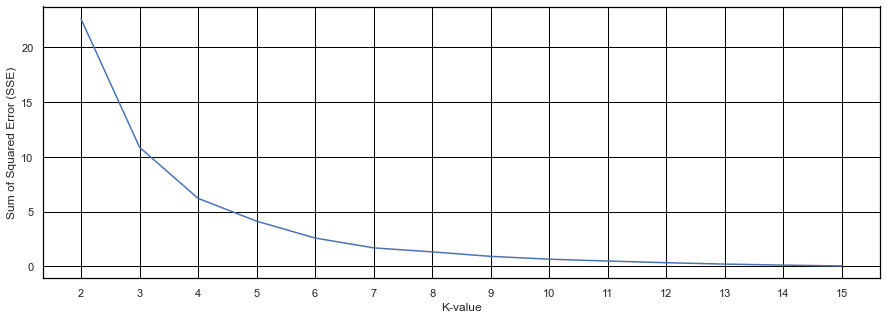

In [32]:
#Elbow method
plt.figure(figsize=(15, 5))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.plot(range(2, 16),inertia)
plt.xticks([i for i in range(2, 16)])
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Error (SSE)')
plt.grid(True,color='black')

#Range of k-value = {6,7,8}

In [33]:
#Silhouette Score Method
from sklearn import metrics

silhouette_score = []
for k in tqdm(range(2,19)):  #Max 19 cant exceed n_samples-1 (19 coins)
    
    kmeans= KMeans(n_clusters=k,random_state=seed,n_jobs=-1)
    kmeans.fit(X)
    silhouette= metrics.silhouette_score(X, kmeans.labels_,random_state=10)
    silhouette_score.append(silhouette)
    #print(silhouette)

100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 179.54it/s]


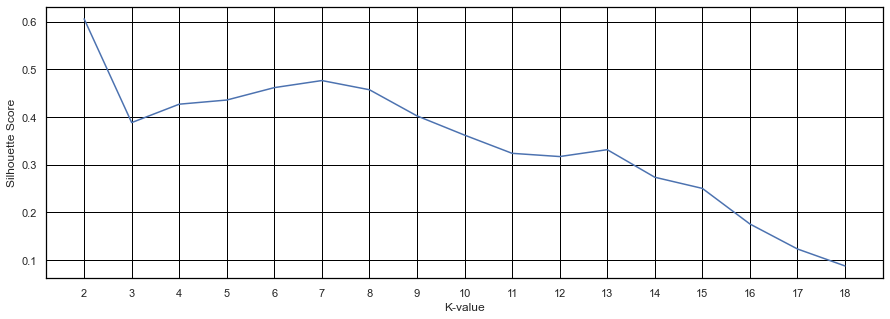

In [34]:
plt.figure(figsize=(15, 5))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.plot(range(2, 19),silhouette_score)
plt.xticks([i for i in range(2, 19)])
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.grid(True,color='black')
#Range of k-value={6,7,8}
#More precise Range of k can be calculated through krish naik article.

Considering both tests taking k=6 (as 6 has more silhouette score than 7)

In [90]:
seed=42
n_clusters1=3
k_means= KMeans(n_clusters= n_clusters1,n_jobs=-1,random_state=seed)
k_means.fit(X)
target_labels= k_means.predict(X)
print(target_labels)
centroids = k_means.cluster_centers_
print(centroids)

[1 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1]
[[-0.28269796  0.53946447]
 [-0.04123022 -1.0972746 ]
 [ 3.39828908  1.74681299]]


In [91]:
cluster_labels1= k_means.labels_
#cluister_labels1

Text(0, 0.5, 'Annualized Volatility')

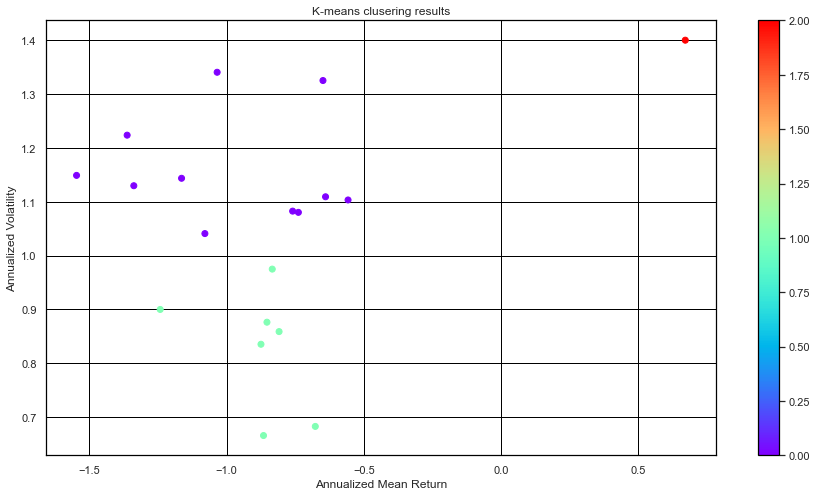

In [92]:
#centroids[:,0]
#centroids[:,:1]
plt.figure(figsize=(15,8))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(centroids[:,0],centroids[:,1],marker='*',linewidth=4)
#plt.scatter(X.iloc[:,0],X.iloc[:,1],c=cluster_labels1,cmap ="rainbow")
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=cluster_labels1,cmap ="rainbow")
plt.colorbar()
plt.grid(True, color='black')
plt.title('K-means clusering results')
plt.xlabel('Annualized Mean Return')
plt.ylabel('Annualized Volatility')

In [39]:
clustered_series1 = pd.Series(index= X.index, data= k_means.labels_)

In [40]:
clustered_series1[clustered_series1==1]

SOL     1
MANA    1
COMP    1
ENJ     1
dtype: int32

In [41]:
clustered_series1.value_counts()

4    6
0    4
1    4
2    2
5    2
3    1
dtype: int64

In [42]:
#plt.barh(clustered_series.value_counts(), width=range(0,len(clustered_series)))

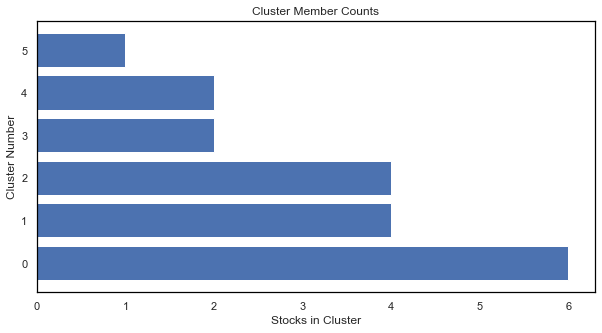

In [43]:
#showing number of stocks in each cluster
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
clustered_series = pd.Series(index=X.index, data=k_means.labels_)

plt.figure(figsize=(10,5))
plt.barh(range(len(clustered_series1.value_counts())),clustered_series1.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

## Agglomerative clustering

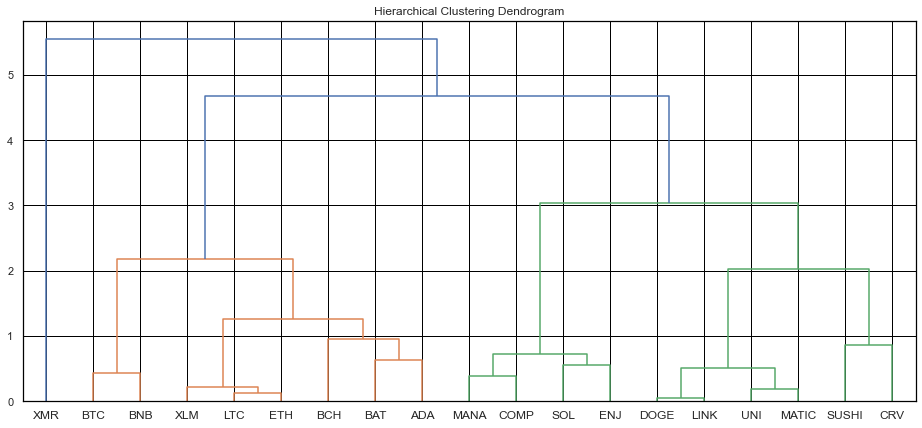

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

def plot_dendrogram(Y,model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    '''
    linkage_matrix=linkage(X, method='ward')
    # Plot the corresponding dendrogram
    plt.figure(figsize=(16,7))
    plt.title("Hierarchical Clustering Dendrogram")
    dendrogram(linkage_matrix,labels = Y.index, **kwargs)
    return linkage_matrix


#iris = load_iris()
#X = iris.data
#Y=[[12,13],[15,25],[17,30]]
#Y=[[12,13,19],[15,25,17],[21,20,16],[12,78,1000]]
# setting distance_threshold=0 ensures we compute the full tree.
agglomerative = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

agglomerative = agglomerative.fit(X)
# plot the top three levels of the dendrogram
linkage_matrix=plot_dendrogram(X,agglomerative, truncate_mode="level", p=30)
plt.grid(which='major', color='black')
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")

In [65]:
distance_threshold = 2.2
#range bn 2 to 3
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')
#The fcluster() method forms flat clusters from the hierarchical clustering. 
#This hierarchical clustering is defined by the given linkage matrix, identifying a link between clustered classes.
chosen_clusters = pd.Series(data=clusters,index= X.index)
np.sort(chosen_clusters.unique())

array([1, 2, 3, 4])

In [66]:
n_clusters2=4
agglomerative= AgglomerativeClustering(n_clusters=n_clusters2, affinity = 'euclidean', linkage = 'ward')
cluster_labels2 = agglomerative.fit_predict(X)

In [67]:
clustered_series2 = pd.Series(index= X.index, data= cluster_labels2)
np.sort(clustered_series2.unique())

array([0, 1, 2, 3], dtype=int64)

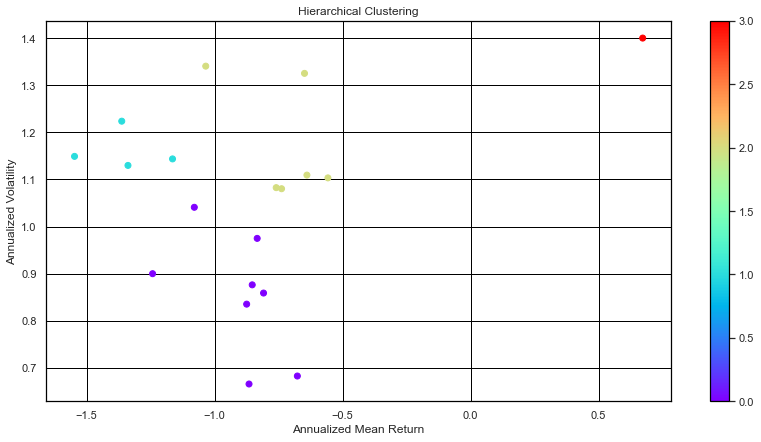

In [70]:
plt.figure(figsize=(14,7))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(X.iloc[:,0],X.iloc[:,1], c =cluster_labels2,cmap='rainbow')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c =cluster_labels2,cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annualized Mean Return')
plt.ylabel('Annualized Volatility')
plt.grid(which='major', color='black')
plt.colorbar()

## Affinity Propagation

In [79]:
for i in tqdm(range(3,20)):
    affine = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=i,verbose=True)
    affine.fit(X)
    silhouette= metrics.silhouette_score(X,affine.predict(X),random_state=10)
    print(">> Silhouette Score at {0} is {1}% ".format(i,np.round(silhouette*100,3)))
    

100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 124.05it/s]

Converged after 11 iterations.
>> Silhouette Score at 3 is 42.684% 
Converged after 12 iterations.
>> Silhouette Score at 4 is 42.684% 
Converged after 13 iterations.
>> Silhouette Score at 5 is 42.684% 
Converged after 14 iterations.
>> Silhouette Score at 6 is 42.684% 
Converged after 15 iterations.
>> Silhouette Score at 7 is 42.684% 
Converged after 16 iterations.
>> Silhouette Score at 8 is 42.684% 
Converged after 17 iterations.
>> Silhouette Score at 9 is 42.684% 
Converged after 18 iterations.
>> Silhouette Score at 10 is 42.684% 
Converged after 19 iterations.
>> Silhouette Score at 11 is 42.684% 
Converged after 20 iterations.
>> Silhouette Score at 12 is 42.684% 
Converged after 21 iterations.
>> Silhouette Score at 13 is 42.684% 
Converged after 22 iterations.
>> Silhouette Score at 14 is 42.684% 
Converged after 23 iterations.
>> Silhouette Score at 15 is 42.684% 
Converged after 24 iterations.
>> Silhouette Score at 16 is 42.684% 
Converged after 25 iterations.
>> Silhoue

In [80]:
#convergence_iter is max till 10
affinity = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=15)
#affinity2 = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=11)
affinity.fit(X)
#affinity2.fit(X)
#requires no cluster value.

AffinityPropagation(random_state=42)

In [81]:
cluster_labels3 = affinity.predict(X)  #With 10 iteration
#cluster_labels3_2 = affinity2.predict(X)  #With 11 iteration
print(np.unique(cluster_labels3_1))
#print(np.unique(cluster_labels3_2))

[0 1 2 3]


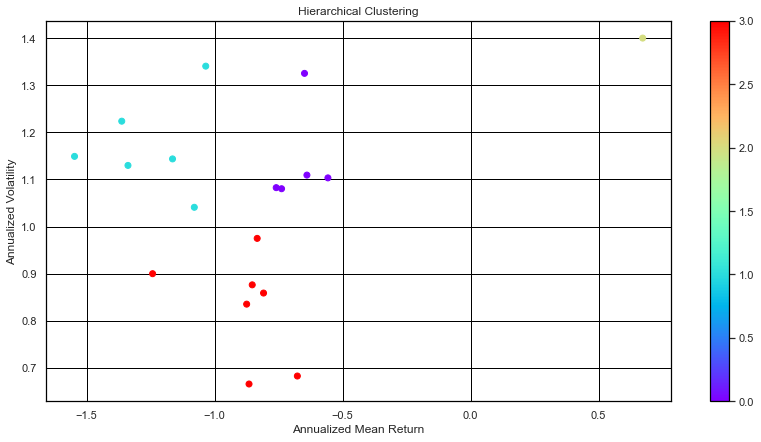

In [82]:
plt.figure(figsize=(14,7))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(X.iloc[:,0],X.iloc[:,1], c =cluster_labels2,cmap='rainbow')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c =cluster_labels3,cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annualized Mean Return')
plt.ylabel('Annualized Volatility')
plt.grid(which='major', color='black')
plt.colorbar()

## Collectively plotting the results

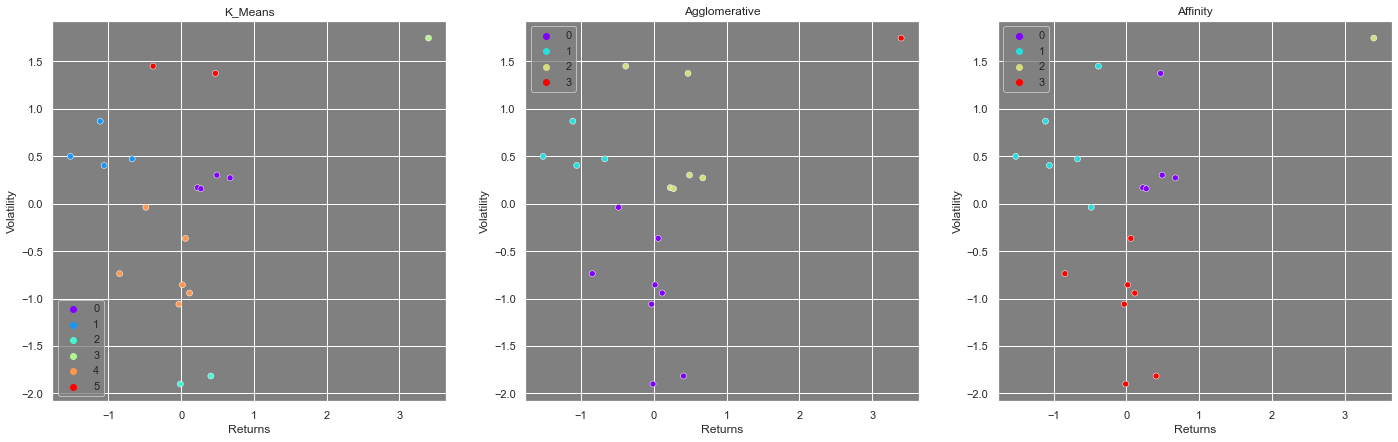

In [84]:
#Normalised Graphs
plt.figure(figsize=(24,7))
sns.set(rc={'axes.facecolor':'grey'})
i=1
for c in [[cluster_labels1, 'K_Means'],[cluster_labels2,'Agglomerative'],[cluster_labels3,'Affinity']]:
    plt.subplot(1,3,i)
    i+=1
    sns.scatterplot(X.iloc[:,0],X.iloc[:,1], hue =c[0],palette='rainbow')
    plt.title(c[1])

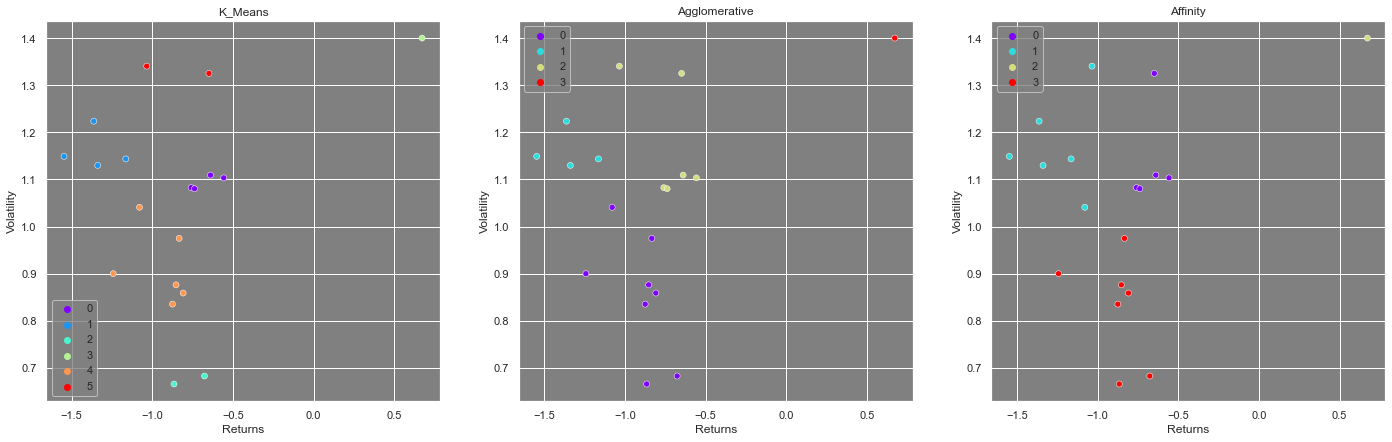

In [85]:
#Denormalised Graphs
plt.figure(figsize=(24,7))
sns.set(rc={'axes.facecolor':'grey'})
i=1
for c in [[cluster_labels1, 'K_Means'],[cluster_labels2,'Agglomerative'],[cluster_labels3,'Affinity']]:
    plt.subplot(1,3,i)
    i+=1
    sns.scatterplot(data.iloc[:,0],data.iloc[:,1], hue =c[0],palette='rainbow')
    plt.title(c[1])

In [86]:
#data
cluster_labels2

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Selecting best model

In [94]:
print("KNN: {0}".format(metrics.silhouette_score(X, cluster_labels1,metric='euclidean',random_state=seed)))
print("Agglomerative: {0}".format(metrics.silhouette_score(X, cluster_labels2,metric='euclidean',random_state=seed)))
print("Affinity Propagation: {0}".format(metrics.silhouette_score(X, cluster_labels3,metric='euclidean',random_state=seed)))
#print("Affinity Propagation 2: {0}".format(metrics.silhouette_score(X, cluster_labels3_2,metric='euclidean',random_state=seed)))

KNN: 0.388211798206054
Agglomerative: 0.4010876172901224
Affinity Propagation: 0.4268365411366032


In [95]:
cluster_labels1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#pwd

In [99]:
clustered_series= pd.Series(index=X.index, data= cluster_labels3)
counts= clustered_series.value_counts()
#cluster_vis = list

In [138]:
clustered_series[clustered_series==1].index


Index(['SUSHI', 'SOL', 'MANA', 'COMP', 'BAT', 'ENJ'], dtype='object')

In [132]:
(cluster_labels3)

array([3, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [139]:
#plt.figure(figsize=(14,7))
cluster_list=[]
da1_pct=da1.pct_change(periods=24*12)

for i in range(0,len(np.unique(cluster_labels3))):
    if(counts[i]>=1):
        cluster_list.append(clustered_series[clustered_series==i].index)    

<AxesSubplot:xlabel='Observation Time', ylabel='Price'>

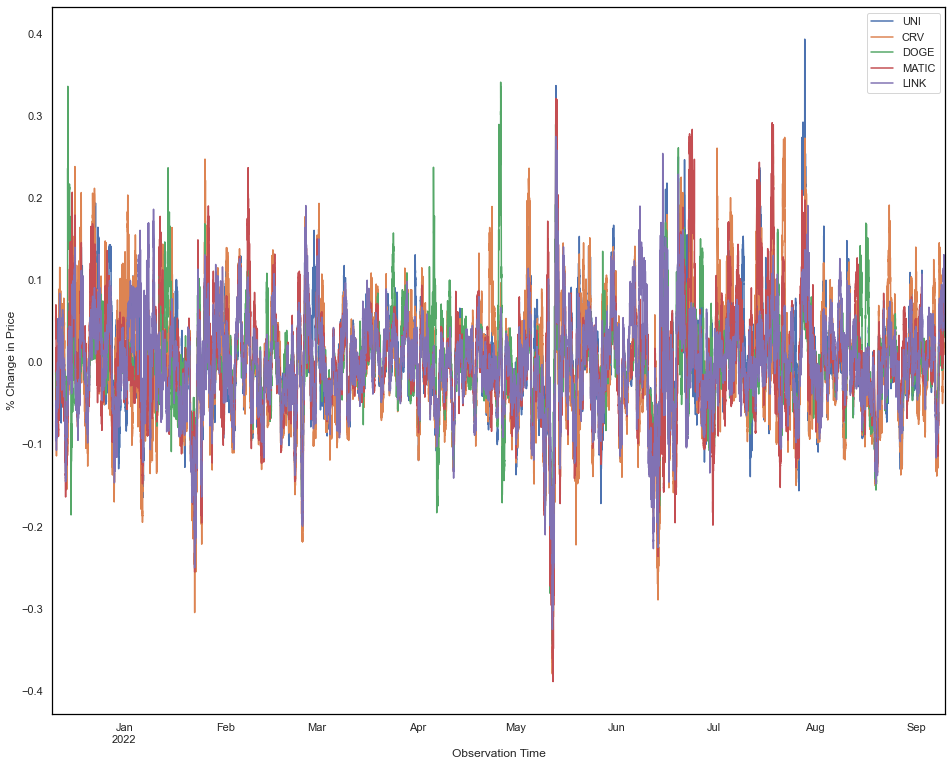

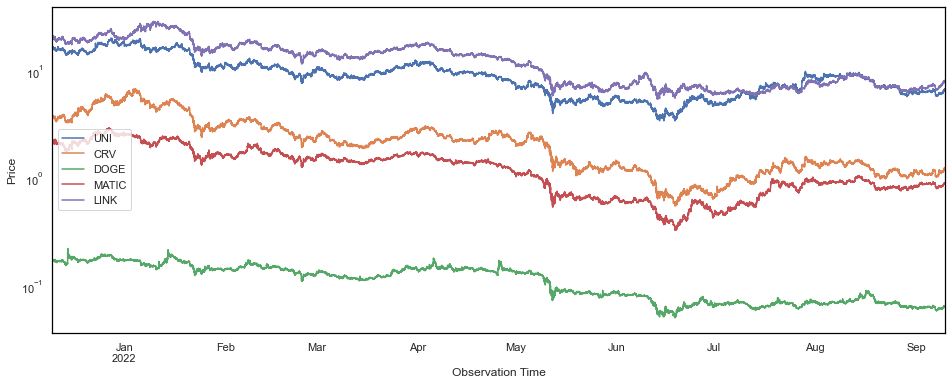

In [140]:
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
da1_pct[cluster_list[0]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[0]].plot(figsize=(16,6),logy=True,secondary_y='SOL',grid=True,xlabel='Observation Time',ylabel= 'Price')

<AxesSubplot:xlabel='Observation Time', ylabel='Log Price'>

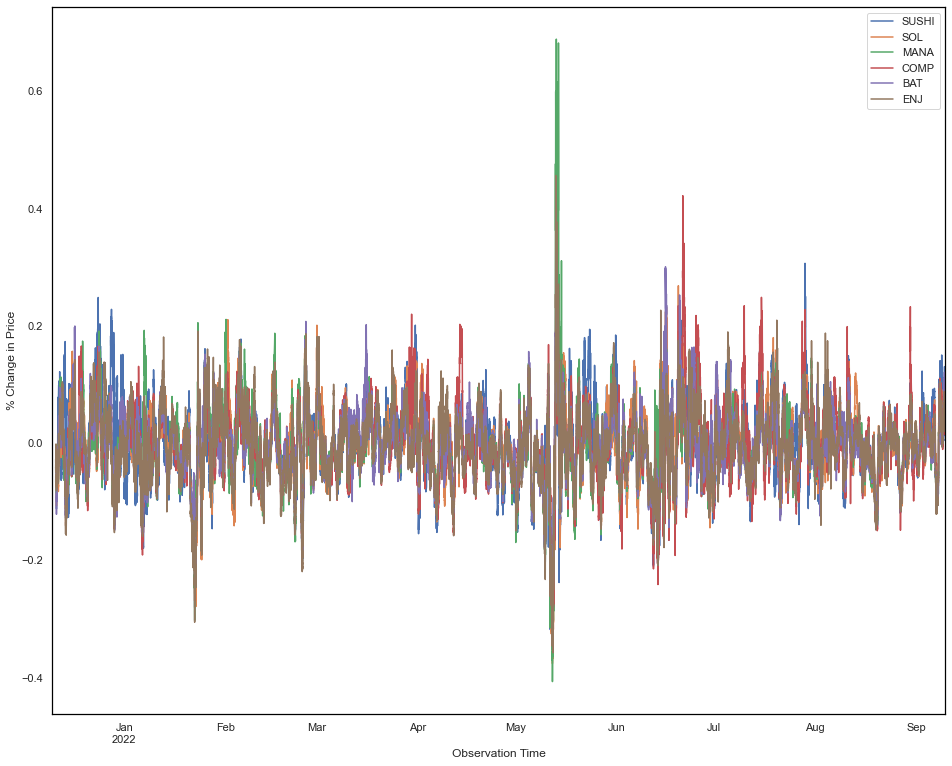

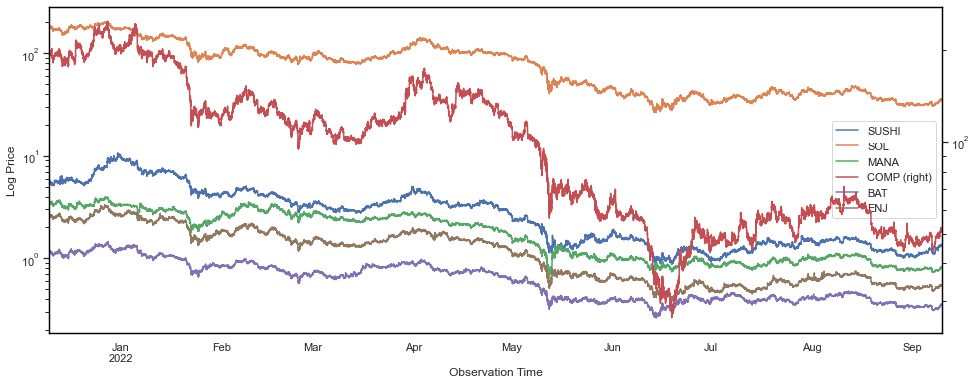

In [141]:
da1_pct[cluster_list[1]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[1]].plot(figsize=(16,6),logy=True,secondary_y=['COMP','BCH','LTC'],xlabel='Observation Time',ylabel= 'Log Price')
#da1[cluster_list[1]].plot(figsize=(16,6),subplots=[('COMP', 'BTC'), ('LTC', 'DOGE')] )

<AxesSubplot:xlabel='Observation Time', ylabel='Log Price'>

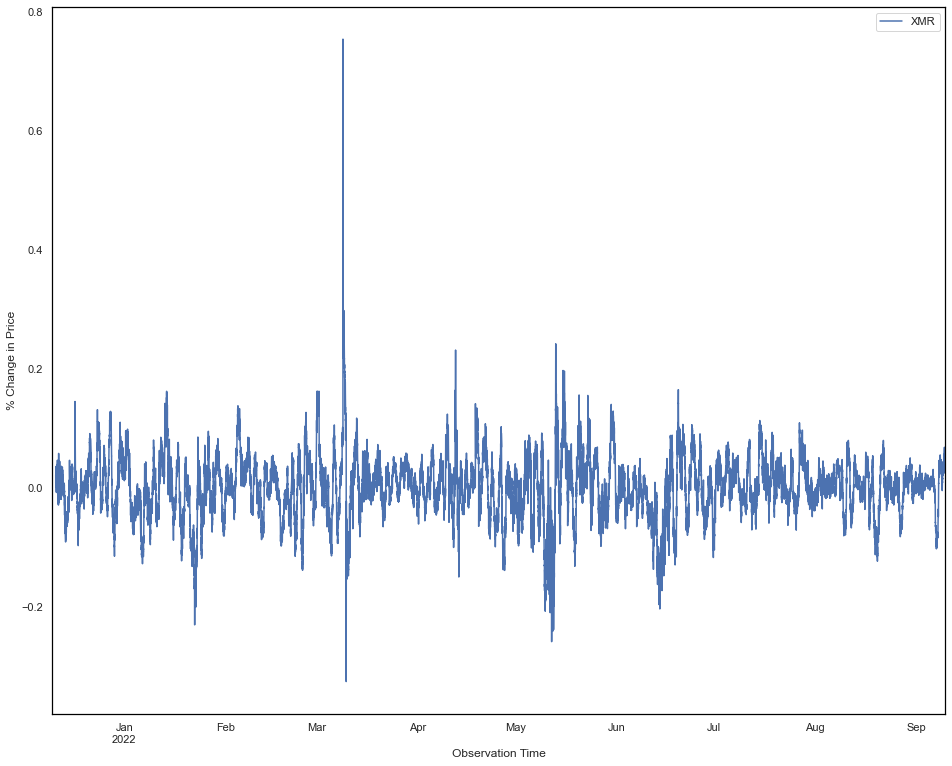

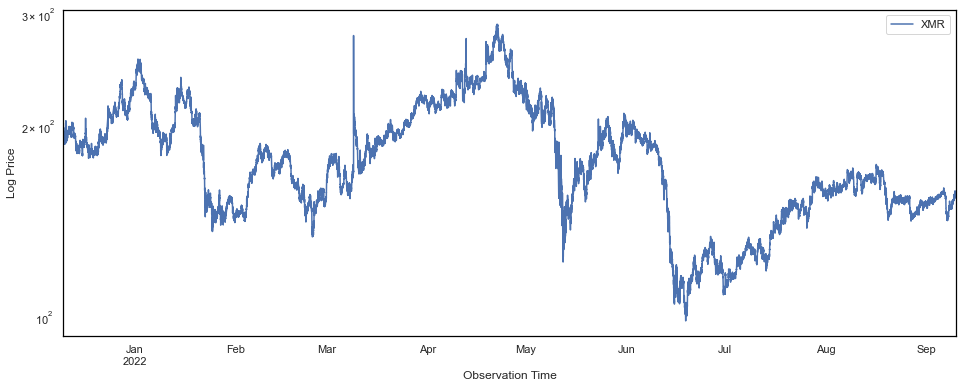

In [142]:
da1_pct[cluster_list[2]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[2]].plot(figsize=(16,6),grid=True,logy=True,xlabel='Observation Time',ylabel= 'Log Price')

In [167]:
cluster_list[2]

Index(['XMR'], dtype='object')

## Statistical Tests:
ADF(Dicky Fuller) Test>>
Cointegration Test>>
2 step Engle-Granger Approach with Error correcting model.

In [144]:
da1=da_1[st:en_mid]

In [145]:
from statsmodels.tsa.stattools import adfuller

In [146]:
len(np.unique(cluster_labels3))

4

In [147]:
#ADF test
def ADFtest(df,clust_list):
    
    clust_list1=[]
    
    for i in tqdm_notebook(range(0,len(np.unique(cluster_labels3))),desc='Cluster Checking'):
        temp=[]
        for stock in tqdm_notebook(list(clust_list[i])):
            result=adfuller(df[stock])
            #print('p-value: {0} for {1}'.format(result[1],stock))
            if(result[1]<=0.05):
                pass
                #print("Against Null hypo data is stationary")
            else:
                #print("For Null hypo data is not stationary")
                temp.append(stock)
                print(stock)
        clust_list1.append(temp)
        
    return clust_list1
            

In [148]:
cluster_list

[Index(['UNI', 'CRV', 'DOGE', 'MATIC', 'LINK'], dtype='object'),
 Index(['SUSHI', 'SOL', 'MANA', 'COMP', 'BAT', 'ENJ'], dtype='object'),
 Index(['XMR'], dtype='object'),
 Index(['BTC', 'BCH', 'XLM', 'ADA', 'BNB', 'LTC', 'ETH'], dtype='object')]

In [149]:
cluster_list1= ADFtest(da1,cluster_list)

Cluster Checking:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

UNI
CRV
DOGE
MATIC
LINK


  0%|          | 0/6 [00:00<?, ?it/s]

SUSHI
SOL
MANA
COMP
BAT
ENJ


  0%|          | 0/1 [00:00<?, ?it/s]

XMR


  0%|          | 0/7 [00:00<?, ?it/s]

BTC
BCH
XLM
ADA
BNB
LTC
ETH


In [157]:
da1.index

DatetimeIndex(['2021-12-10 00:00:00', '2021-12-10 00:05:00',
               '2021-12-10 00:10:00', '2021-12-10 00:15:00',
               '2021-12-10 00:20:00', '2021-12-10 00:25:00',
               '2021-12-10 00:30:00', '2021-12-10 00:35:00',
               '2021-12-10 00:40:00', '2021-12-10 00:45:00',
               ...
               '2022-09-09 23:15:00', '2022-09-09 23:20:00',
               '2022-09-09 23:25:00', '2022-09-09 23:30:00',
               '2022-09-09 23:35:00', '2022-09-09 23:40:00',
               '2022-09-09 23:45:00', '2022-09-09 23:50:00',
               '2022-09-09 23:55:00', '2022-09-10 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=78913, freq=None)

In [158]:
da1_diff=pd.DataFrame()
coin= da_1.columns
for i in coin:
    da1_diff[i]=da1[i]-da1[i].shift(1)
da1_diff.fillna(method='bfill',inplace=True)
da1.fillna(method='bfill',inplace=True)
da1_diff_1=da1_diff.shift(1)
da1_diff_1.fillna(method='bfill',inplace=True)

In [168]:
def ADFtest_diff(df,clust_list):
    clust_list1=[]
    
    for i in tqdm_notebook(range(0,len(np.unique(cluster_labels3))),desc='Cluster Checking'):
        temp=[]
        for stock in tqdm_notebook(list(clust_list[i])):
            result=adfuller(df[stock])
            #print('p-value: {0} for {1}'.format(result[1],stock))
            if(result[1]<=0.05):
                temp.append(stock)
                print(stock)
                #print("Against Null hypo data is stationary")
                
        clust_list1.append(temp)
        
    return clust_list1

In [169]:
cluster_list1_final= ADFtest_diff(da1_diff,cluster_list1)

Cluster Checking:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

UNI
CRV
DOGE
MATIC
LINK


  0%|          | 0/6 [00:00<?, ?it/s]

SUSHI
SOL
MANA
COMP
BAT
ENJ


  0%|          | 0/1 [00:00<?, ?it/s]

XMR


  0%|          | 0/7 [00:00<?, ?it/s]

BTC
BCH
XLM
ADA
BNB
LTC
ETH


In [170]:
print(cluster_list)
print(cluster_list1)
print(cluster_list1_final)

[Index(['UNI', 'CRV', 'DOGE', 'MATIC', 'LINK'], dtype='object'), Index(['SUSHI', 'SOL', 'MANA', 'COMP', 'BAT', 'ENJ'], dtype='object'), Index(['XMR'], dtype='object'), Index(['BTC', 'BCH', 'XLM', 'ADA', 'BNB', 'LTC', 'ETH'], dtype='object')]
[['UNI', 'CRV', 'DOGE', 'MATIC', 'LINK'], ['SUSHI', 'SOL', 'MANA', 'COMP', 'BAT', 'ENJ'], ['XMR'], ['BTC', 'BCH', 'XLM', 'ADA', 'BNB', 'LTC', 'ETH']]
[['UNI', 'CRV', 'DOGE', 'MATIC', 'LINK'], ['SUSHI', 'SOL', 'MANA', 'COMP', 'BAT', 'ENJ'], ['XMR'], ['BTC', 'BCH', 'XLM', 'ADA', 'BNB', 'LTC', 'ETH']]


In [172]:
#Coint Test
def coint(df):
    pair=pd.DataFrame()
    for i in tqdm(df.columns):
        for j in tqdm_notebook(df.columns):
            if i!=j:
                Y = df[i]
                X = df[j]
                X= sm.add_constant(X)
                model = sm.OLS(Y,X)
                results = model.fit()
                resid_dumm= pd.DataFrame(results.resid)
                p_value=adfuller(resid_dumm)
                if p_value[1]<0.05:
                    pair[(i,j)]= pd.DataFrame(results.resid) 
    return pair

In [173]:
pair0=  coint(da1[cluster_list1_final[0]])

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|████████████████▊                                                                   | 1/5 [01:06<04:25, 66.31s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 40%|█████████████████████████████████▌                                                  | 2/5 [02:11<03:16, 65.57s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [03:16<02:10, 65.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [04:20<01:04, 64.85s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:22<00:00, 64.43s/it]


In [174]:
pair0

,"(UNI, CRV)","(UNI, MATIC)","(CRV, UNI)","(CRV, MATIC)","(CRV, LINK)","(MATIC, UNI)","(MATIC, CRV)","(LINK, CRV)"
Time,,,,,,,,
2021-12-10 00:00:00,3.225687,2.108551,-0.960247,-0.315682,-0.332787,-0.267218,0.206059,2.200766
2021-12-10 00:05:00,3.213006,2.225024,-0.955854,-0.270013,-0.380562,-0.286673,0.184627,2.416728
2021-12-10 00:10:00,3.219297,2.132866,-0.959891,-0.305902,-0.410430,-0.271947,0.200683,2.541526
2021-12-10 00:15:00,3.193630,1.970596,-0.953356,-0.355427,-0.472120,-0.246040,0.223031,2.808438
2021-12-10 00:20:00,3.193936,1.914123,-0.951105,-0.374096,-0.423949,-0.235856,0.232820,2.603450
...,...,...,...,...,...,...,...,...
2022-09-09 23:40:00,0.073180,-0.471234,-0.122755,-0.249869,-0.007974,0.045702,0.075382,-0.474881
2022-09-09 23:45:00,0.083180,-0.461836,-0.126147,-0.250082,-0.008639,0.044256,0.075482,-0.471881
2022-09-09 23:50:00,0.076582,-0.488461,-0.124362,-0.257422,-0.013418,0.048447,0.078738,-0.452691


In [175]:
pair1=  coint(da1[cluster_list1_final[1]])

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|██████████████                                                                      | 1/6 [01:22<06:52, 82.40s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 2/6 [02:42<05:23, 80.81s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [04:09<04:11, 83.77s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [05:27<02:43, 81.57s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [06:48<01:21, 81.37s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [08:06<00:00, 81.06s/it]


In [176]:
pair1

,"(SUSHI, SOL)","(SUSHI, COMP)","(SUSHI, BAT)","(SUSHI, ENJ)","(SOL, SUSHI)","(SOL, COMP)","(SOL, BAT)","(SOL, ENJ)","(COMP, SUSHI)","(COMP, SOL)","(COMP, BAT)","(COMP, ENJ)","(BAT, SUSHI)","(BAT, SOL)","(BAT, COMP)","(BAT, ENJ)","(ENJ, SUSHI)","(ENJ, SOL)","(ENJ, COMP)","(ENJ, BAT)"
Time,,,,,,,,,,,,,,,,,,,,
2021-12-10 00:00:00,-1.695946,-1.009083,-1.110802,-1.220034,46.092848,17.971486,16.965963,14.863838,33.039890,-18.643263,-0.195236,-2.848997,0.185242,-0.080944,0.022098,-0.006843,0.499174,-0.177504,0.083197,0.045389
2021-12-10 00:05:00,-1.693951,-0.991494,-1.067429,-1.168265,46.043657,18.325876,17.892905,15.974428,32.564443,-19.062591,0.467215,-1.969546,0.179073,-0.086821,0.018397,-0.005774,0.480510,-0.195421,0.070852,0.042292
2021-12-10 00:10:00,-1.721827,-0.982163,-1.086707,-1.248925,46.595220,19.169290,18.075990,14.782383,32.222016,-20.062951,-0.316140,-4.358586,0.181383,-0.088047,0.022354,-0.014392,0.508624,-0.176400,0.103155,0.064360
2021-12-10 00:15:00,-1.702761,-1.055494,-1.151855,-1.265593,46.085453,17.035876,16.143995,13.938792,34.135844,-17.575917,-0.067881,-2.840778,0.190359,-0.076113,0.021297,-0.007528,0.514030,-0.163469,0.082852,0.046972
2021-12-10 00:20:00,-1.723688,-1.004752,-1.140715,-1.280698,46.628457,18.694900,16.902453,14.111020,32.820228,-19.505328,-1.126204,-4.584613,0.189008,-0.080644,0.026855,-0.011171,0.519969,-0.165627,0.106500,0.056438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 23:40:00,0.273558,0.216934,0.391139,0.253320,-10.967924,-2.411311,0.776264,-2.512033,-10.016125,1.605245,3.162188,-0.561541,-0.075052,-0.017735,-0.029078,-0.024291,-0.133665,0.010289,-0.017211,0.045990
2022-09-09 23:45:00,0.271997,0.222049,0.398660,0.258986,-10.921161,-2.255847,0.985386,-2.344752,-10.144337,1.425425,3.224446,-0.547979,-0.076076,-0.019022,-0.029422,-0.024559,-0.135610,0.007678,-0.017412,0.046652
2022-09-09 23:50:00,0.276558,0.222908,0.392730,0.256875,-11.030352,-2.343408,0.744615,-2.499606,-10.169784,1.525245,3.045285,-0.627021,-0.075245,-0.017535,-0.028462,-0.024014,-0.134874,0.010089,-0.016346,0.045285


In [177]:
pair2=  coint(da1[cluster_list1_final[2]])

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.08it/s]


In [178]:
pair2

""


In [183]:
pair3= coint(da1[cluster_list1_final[3]])

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [01:32<09:12, 92.06s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

 29%|████████████████████████                                                            | 2/7 [03:02<07:35, 91.07s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

 43%|████████████████████████████████████                                                | 3/7 [04:33<06:04, 91.08s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [06:04<04:33, 91.09s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [07:33<03:00, 90.45s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [09:06<01:31, 91.25s/it]

  0%|          | 0/7 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:36<00:00, 90.92s/it]


In [188]:
cluster_list1_final[0]

['UNI', 'CRV', 'DOGE', 'MATIC', 'LINK']

In [190]:
def ECM(df,df_diff,df_diff_1,pairi):
    
    sel_pair=[]
    error_coeff=[]
    
    for i in tqdm(pairi.columns):
    
        y=pd.DataFrame()
        y= pd.DataFrame(df_diff[i[0]]) ###(Dependent,independent)
        X=pd.DataFrame()
        #X[str(i[0])+"1"]=df_diff_1[i[0]] #Extended eqn of Graner Approach.
        X[i[1]]=df_diff[i[1]]
        #X[str(i[1])+"1"]=-df_diff_1[i[1]].shift(1)  #re
        #X[str(i[0])+"0"]=df_diff_1[i[0]].shift(1)  #re
         
        X['residual']= pairi[i].shift(1)
        #X['residual'].fillna(method='bfill',inplace=True)
        X=sm.add_constant(X)
        X.fillna(method='bfill', inplace=True)
        y.fillna(method='bfill', inplace=True)
    
        #store= df[i[1]].shift(1)
        #store.fillna(method='bfill',inplace=True)
        #X[str(i[1])+'res']=df[i[1]]-store
    
    
        model=sm.OLS(y,X)
        results=model.fit()
        print("Error Coefficient of {0} pair is {1}".format(i,results.params.loc['residual']))
        print(results.summary())
        error_coeff.append(results.params.loc['residual'])
        sel_pair.append(i)
    
    
    ecm =pd.DataFrame()
    ecm['pairs']= sel_pair
    ecm['error_coeff']= error_coeff
    return ecm

In [191]:
sel_pair0= ECM(da1[cluster_list1_final[0]],da1_diff[cluster_list1_final[0]],da1_diff_1[cluster_list1_final[0]],pair0)

 12%|██████████▌                                                                         | 1/8 [00:00<00:01,  3.60it/s]

Error Coefficient of ('UNI', 'CRV') pair is -0.00035753421230730277
                            OLS Regression Results                            
Dep. Variable:                    UNI   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:20:56   Log-Likelihood:             1.7086e+05
No. Observations:               78913   AIC:                        -3.417e+05
Df Residuals:                   78910   BIC:                        -3.417e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 25%|█████████████████████                                                               | 2/8 [00:00<00:01,  3.81it/s]

Error Coefficient of ('UNI', 'MATIC') pair is -0.000987186064665396
                            OLS Regression Results                            
Dep. Variable:                    UNI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.86
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           9.17e-20
Time:                        17:20:56   Log-Likelihood:             1.6040e+05
No. Observations:               78913   AIC:                        -3.208e+05
Df Residuals:                   78910   BIC:                        -3.208e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:01,  3.83it/s]

Error Coefficient of ('CRV', 'UNI') pair is -0.000279039476995053
                            OLS Regression Results                            
Dep. Variable:                    CRV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:20:56   Log-Likelihood:             2.5654e+05
No. Observations:               78913   AIC:                        -5.131e+05
Df Residuals:                   78910   BIC:                        -5.130e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

 50%|██████████████████████████████████████████                                          | 4/8 [00:01<00:01,  3.89it/s]

Error Coefficient of ('CRV', 'MATIC') pair is -0.000770722143093434
                            OLS Regression Results                            
Dep. Variable:                    CRV   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     31.89
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.43e-14
Time:                        17:20:56   Log-Likelihood:             2.4608e+05
No. Observations:               78913   AIC:                        -4.922e+05
Df Residuals:                   78910   BIC:                        -4.921e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:01<00:00,  3.84it/s]

Error Coefficient of ('CRV', 'LINK') pair is -0.00035289495874363805
                            OLS Regression Results                            
Dep. Variable:                    CRV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.08
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.82e-07
Time:                        17:20:57   Log-Likelihood:             2.4606e+05
No. Observations:               78913   AIC:                        -4.921e+05
Df Residuals:                   78910   BIC:                        -4.921e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:01<00:00,  3.90it/s]

Error Coefficient of ('MATIC', 'UNI') pair is 6.465104417499586e-05
                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.194
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00204
Time:                        17:20:57   Log-Likelihood:             3.1647e+05
No. Observations:               78913   AIC:                        -6.329e+05
Df Residuals:                   78910   BIC:                        -6.329e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:01<00:00,  3.89it/s]

Error Coefficient of ('MATIC', 'CRV') pair is 5.637791238050237e-05
                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.504
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.222
Time:                        17:20:57   Log-Likelihood:             3.1647e+05
No. Observations:               78913   AIC:                        -6.329e+05
Df Residuals:                   78910   BIC:                        -6.329e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.88it/s]

Error Coefficient of ('LINK', 'CRV') pair is -0.0002385209782126681
                            OLS Regression Results                            
Dep. Variable:                   LINK   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.01
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.66e-05
Time:                        17:20:57   Log-Likelihood:             1.3495e+05
No. Observations:               78913   AIC:                        -2.699e+05
Df Residuals:                   78910   BIC:                        -2.699e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [192]:
sel_pair1= ECM(da1[cluster_list1_final[1]],da1_diff[cluster_list1_final[1]],da1_diff_1[cluster_list1_final[1]],pair1)

  5%|████▏                                                                              | 1/20 [00:00<00:05,  3.78it/s]

Error Coefficient of ('SUSHI', 'SOL') pair is -0.0002592900505562075
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:20:58   Log-Likelihood:             2.2941e+05
No. Observations:               78913   AIC:                        -4.588e+05
Df Residuals:                   78910   BIC:                        -4.588e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 10%|████████▎                                                                          | 2/20 [00:00<00:08,  2.09it/s]

Error Coefficient of ('SUSHI', 'COMP') pair is -0.0005469575318099205
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     438.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.53e-190
Time:                        17:20:59   Log-Likelihood:             2.1919e+05
No. Observations:               78913   AIC:                        -4.384e+05
Df Residuals:                   78910   BIC:                        -4.383e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

 15%|████████████▍                                                                      | 3/20 [00:01<00:06,  2.67it/s]

Error Coefficient of ('SUSHI', 'BAT') pair is -0.0007566703367854855
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     487.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.97e-211
Time:                        17:20:59   Log-Likelihood:             2.1924e+05
No. Observations:               78913   AIC:                        -4.385e+05
Df Residuals:                   78910   BIC:                        -4.384e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 20%|████████████████▌                                                                  | 4/20 [00:01<00:05,  3.07it/s]

Error Coefficient of ('SUSHI', 'ENJ') pair is -0.0008711582630353808
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.18
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.64e-18
Time:                        17:20:59   Log-Likelihood:             2.1879e+05
No. Observations:               78913   AIC:                        -4.376e+05
Df Residuals:                   78910   BIC:                        -4.376e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 25%|████████████████████▊                                                              | 5/20 [00:01<00:04,  3.30it/s]

Error Coefficient of ('SOL', 'SUSHI') pair is -0.00011384325432311662
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:00   Log-Likelihood:                -2684.6
No. Observations:               78913   AIC:                             5375.
Df Residuals:                   78910   BIC:                             5403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

 30%|████████████████████████▉                                                          | 6/20 [00:01<00:04,  3.47it/s]

Error Coefficient of ('SOL', 'COMP') pair is -0.0013193649831679068
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     628.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.46e-271
Time:                        17:21:00   Log-Likelihood:                -12712.
No. Observations:               78913   AIC:                         2.543e+04
Df Residuals:                   78910   BIC:                         2.546e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 35%|█████████████████████████████                                                      | 7/20 [00:02<00:03,  3.66it/s]

Error Coefficient of ('SOL', 'BAT') pair is -0.000989600167068796
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     732.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.61e-316
Time:                        17:21:00   Log-Likelihood:                -12611.
No. Observations:               78913   AIC:                         2.523e+04
Df Residuals:                   78910   BIC:                         2.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

 40%|█████████████████████████████████▏                                                 | 8/20 [00:02<00:03,  3.71it/s]

Error Coefficient of ('SOL', 'ENJ') pair is -0.0009505827195881619
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     38.78
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.47e-17
Time:                        17:21:00   Log-Likelihood:                -13297.
No. Observations:               78913   AIC:                         2.660e+04
Df Residuals:                   78910   BIC:                         2.663e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 45%|█████████████████████████████████████▎                                             | 9/20 [00:02<00:02,  3.82it/s]

Error Coefficient of ('COMP', 'SUSHI') pair is -5.730732635556141e-05
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     418.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.58e-181
Time:                        17:21:01   Log-Likelihood:                -34463.
No. Observations:               78913   AIC:                         6.893e+04
Df Residuals:                   78910   BIC:                         6.896e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

 50%|█████████████████████████████████████████                                         | 10/20 [00:02<00:02,  3.89it/s]

Error Coefficient of ('COMP', 'SOL') pair is -0.0007286310998539361
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     598.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.61e-258
Time:                        17:21:01   Log-Likelihood:                -34286.
No. Observations:               78913   AIC:                         6.858e+04
Df Residuals:                   78910   BIC:                         6.861e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 55%|█████████████████████████████████████████████                                     | 11/20 [00:03<00:02,  3.95it/s]

Error Coefficient of ('COMP', 'BAT') pair is -0.0005786442622066839
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 1.999e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:01   Log-Likelihood:                -18703.
No. Observations:               78913   AIC:                         3.741e+04
Df Residuals:                   78910   BIC:                         3.744e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:03<00:02,  3.18it/s]

Error Coefficient of ('COMP', 'ENJ') pair is -0.001291793582209897
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     471.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.05e-204
Time:                        17:21:01   Log-Likelihood:                -34411.
No. Observations:               78913   AIC:                         6.883e+04
Df Residuals:                   78910   BIC:                         6.886e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:03<00:02,  3.42it/s]

Error Coefficient of ('BAT', 'SUSHI') pair is 2.5377767954918495e-06
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     453.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.76e-196
Time:                        17:21:02   Log-Likelihood:             3.7191e+05
No. Observations:               78913   AIC:                        -7.438e+05
Df Residuals:                   78910   BIC:                        -7.438e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:04<00:01,  3.59it/s]

Error Coefficient of ('BAT', 'SOL') pair is -0.00020473483086060756
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     689.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.37e-297
Time:                        17:21:02   Log-Likelihood:             3.7214e+05
No. Observations:               78913   AIC:                        -7.443e+05
Df Residuals:                   78910   BIC:                        -7.442e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:04<00:01,  3.72it/s]

Error Coefficient of ('BAT', 'COMP') pair is -0.0003396375164552297
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 1.998e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:02   Log-Likelihood:             3.8762e+05
No. Observations:               78913   AIC:                        -7.752e+05
Df Residuals:                   78910   BIC:                        -7.752e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:04<00:01,  3.81it/s]

Error Coefficient of ('BAT', 'ENJ') pair is -0.001754743926228484
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     458.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.72e-198
Time:                        17:21:02   Log-Likelihood:             3.7191e+05
No. Observations:               78913   AIC:                        -7.438e+05
Df Residuals:                   78910   BIC:                        -7.438e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:04<00:00,  3.90it/s]

Error Coefficient of ('ENJ', 'SUSHI') pair is 2.118251824308175e-05
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.269
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.103
Time:                        17:21:03   Log-Likelihood:             3.0103e+05
No. Observations:               78913   AIC:                        -6.020e+05
Df Residuals:                   78910   BIC:                        -6.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:05<00:00,  3.95it/s]

Error Coefficient of ('ENJ', 'SOL') pair is -0.00026110269503080497
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.644
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00962
Time:                        17:21:03   Log-Likelihood:             3.0103e+05
No. Observations:               78913   AIC:                        -6.021e+05
Df Residuals:                   78910   BIC:                        -6.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:05<00:00,  4.01it/s]

Error Coefficient of ('ENJ', 'COMP') pair is -0.00023777381465788907
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     426.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.57e-185
Time:                        17:21:03   Log-Likelihood:             3.0145e+05
No. Observations:               78913   AIC:                        -6.029e+05
Df Residuals:                   78910   BIC:                        -6.029e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.59it/s]

Error Coefficient of ('ENJ', 'BAT') pair is -0.000911767839382485
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     426.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.59e-185
Time:                        17:21:03   Log-Likelihood:             3.0145e+05
No. Observations:               78913   AIC:                        -6.029e+05
Df Residuals:                   78910   BIC:                        -6.029e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [193]:
sel_pair2= ECM(da1[cluster_list1_final[2]],da1_diff[cluster_list1_final[2]],da1_diff_1[cluster_list1_final[2]],pair2)

0it [00:00, ?it/s]


In [195]:
sel_pair3= ECM(da1[cluster_list1_final[3]],da1_diff[cluster_list1_final[3]],da1_diff_1[cluster_list1_final[3]],pair3)

  4%|███▏                                                                               | 1/26 [00:00<00:11,  2.18it/s]

Error Coefficient of ('BTC', 'BCH') pair is -0.001158589755860622
                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     36.75
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.12e-16
Time:                        17:21:36   Log-Likelihood:            -4.4533e+05
No. Observations:               78913   AIC:                         8.907e+05
Df Residuals:                   78910   BIC:                         8.907e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

  8%|██████▍                                                                            | 2/26 [00:00<00:07,  3.02it/s]

Error Coefficient of ('BCH', 'BTC') pair is -0.00011197008196277285
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5677
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.567
Time:                        17:21:36   Log-Likelihood:                -78715.
No. Observations:               78913   AIC:                         1.574e+05
Df Residuals:                   78910   BIC:                         1.575e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 12%|█████████▌                                                                         | 3/26 [00:00<00:06,  3.41it/s]

Error Coefficient of ('BCH', 'XLM') pair is -0.0007464314244526
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     463.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.21e-200
Time:                        17:21:37   Log-Likelihood:                -78255.
No. Observations:               78913   AIC:                         1.565e+05
Df Residuals:                   78910   BIC:                         1.565e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

 15%|████████████▊                                                                      | 4/26 [00:01<00:06,  3.62it/s]

Error Coefficient of ('BCH', 'ADA') pair is -0.0003828652886577094
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     589.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.30e-255
Time:                        17:21:37   Log-Likelihood:                -78130.
No. Observations:               78913   AIC:                         1.563e+05
Df Residuals:                   78910   BIC:                         1.563e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 19%|███████████████▉                                                                   | 5/26 [00:01<00:05,  3.71it/s]

Error Coefficient of ('BCH', 'BNB') pair is -0.0005349761514774153
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     747.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.12e-322
Time:                        17:21:37   Log-Likelihood:                -77975.
No. Observations:               78913   AIC:                         1.560e+05
Df Residuals:                   78910   BIC:                         1.560e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 23%|███████████████████▏                                                               | 6/26 [00:01<00:05,  3.82it/s]

Error Coefficient of ('BCH', 'LTC') pair is -0.0012951416382144252
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     578.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.03e-250
Time:                        17:21:37   Log-Likelihood:                -78141.
No. Observations:               78913   AIC:                         1.563e+05
Df Residuals:                   78910   BIC:                         1.563e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 27%|██████████████████████▎                                                            | 7/26 [00:01<00:04,  3.90it/s]

Error Coefficient of ('BCH', 'ETH') pair is -0.0011189958251731546
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     72.01
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           5.69e-32
Time:                        17:21:38   Log-Likelihood:                -78643.
No. Observations:               78913   AIC:                         1.573e+05
Df Residuals:                   78910   BIC:                         1.573e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 31%|█████████████████████████▌                                                         | 8/26 [00:02<00:04,  3.98it/s]

Error Coefficient of ('XLM', 'BCH') pair is -0.0004496255752466755
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     440.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.65e-191
Time:                        17:21:38   Log-Likelihood:             4.9467e+05
No. Observations:               78913   AIC:                        -9.893e+05
Df Residuals:                   78910   BIC:                        -9.893e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 35%|████████████████████████████▋                                                      | 9/26 [00:02<00:04,  3.91it/s]

Error Coefficient of ('XLM', 'ADA') pair is -0.0005825226875931988
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:38   Log-Likelihood:             5.1249e+05
No. Observations:               78913   AIC:                        -1.025e+06
Df Residuals:                   78910   BIC:                        -1.025e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 38%|███████████████████████████████▌                                                  | 10/26 [00:02<00:05,  3.13it/s]

Error Coefficient of ('XLM', 'BNB') pair is -0.000260444825729408
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 2.517e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:39   Log-Likelihood:             5.1370e+05
No. Observations:               78913   AIC:                        -1.027e+06
Df Residuals:                   78910   BIC:                        -1.027e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

 42%|██████████████████████████████████▋                                               | 11/26 [00:03<00:04,  3.35it/s]

Error Coefficient of ('XLM', 'LTC') pair is -0.0006909577895898543
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                 2.648e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:39   Log-Likelihood:             5.1449e+05
No. Observations:               78913   AIC:                        -1.029e+06
Df Residuals:                   78910   BIC:                        -1.029e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 46%|█████████████████████████████████████▊                                            | 12/26 [00:03<00:03,  3.52it/s]

Error Coefficient of ('ADA', 'BCH') pair is -0.0002620926449338938
                            OLS Regression Results                            
Dep. Variable:                    ADA   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     579.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.90e-251
Time:                        17:21:39   Log-Likelihood:             3.6141e+05
No. Observations:               78913   AIC:                        -7.228e+05
Df Residuals:                   78910   BIC:                        -7.228e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 50%|█████████████████████████████████████████                                         | 13/26 [00:03<00:03,  3.65it/s]

Error Coefficient of ('ADA', 'XLM') pair is -0.0006493941868277329
                            OLS Regression Results                            
Dep. Variable:                    ADA   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:39   Log-Likelihood:             3.7910e+05
No. Observations:               78913   AIC:                        -7.582e+05
Df Residuals:                   78910   BIC:                        -7.582e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 54%|████████████████████████████████████████████▏                                     | 14/26 [00:03<00:03,  3.78it/s]

Error Coefficient of ('ADA', 'LTC') pair is -0.0004929507277498587
                            OLS Regression Results                            
Dep. Variable:                    ADA   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.895e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:40   Log-Likelihood:             3.8255e+05
No. Observations:               78913   AIC:                        -7.651e+05
Df Residuals:                   78910   BIC:                        -7.651e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 58%|███████████████████████████████████████████████▎                                  | 15/26 [00:04<00:02,  3.85it/s]

Error Coefficient of ('BNB', 'BTC') pair is -0.00012014704736569963
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.073
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.342
Time:                        17:21:40   Log-Likelihood:                -86487.
No. Observations:               78913   AIC:                         1.730e+05
Df Residuals:                   78910   BIC:                         1.730e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 62%|██████████████████████████████████████████████████▍                               | 16/26 [00:04<00:02,  3.92it/s]

Error Coefficient of ('BNB', 'BCH') pair is -0.00027442687964108055
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     728.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.25e-314
Time:                        17:21:40   Log-Likelihood:                -85766.
No. Observations:               78913   AIC:                         1.715e+05
Df Residuals:                   78910   BIC:                         1.716e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 65%|█████████████████████████████████████████████████████▌                            | 17/26 [00:04<00:02,  3.92it/s]

Error Coefficient of ('BNB', 'XLM') pair is -0.0002574837119395344
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 2.517e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:40   Log-Likelihood:                -67021.
No. Observations:               78913   AIC:                         1.340e+05
Df Residuals:                   78910   BIC:                         1.341e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 69%|████████████████████████████████████████████████████████▊                         | 18/26 [00:04<00:02,  3.91it/s]

Error Coefficient of ('BNB', 'ADA') pair is -0.00018428154807726457
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 3.022e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:41   Log-Likelihood:                -64052.
No. Observations:               78913   AIC:                         1.281e+05
Df Residuals:                   78910   BIC:                         1.281e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 73%|███████████████████████████████████████████████████████████▉                      | 19/26 [00:05<00:02,  3.16it/s]

Error Coefficient of ('BNB', 'LTC') pair is -0.00031792839133481707
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 3.482e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:41   Log-Likelihood:                -61527.
No. Observations:               78913   AIC:                         1.231e+05
Df Residuals:                   78910   BIC:                         1.231e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 77%|███████████████████████████████████████████████████████████████                   | 20/26 [00:05<00:01,  3.40it/s]

Error Coefficient of ('BNB', 'ETH') pair is -0.001684511319712451
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     523.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.65e-226
Time:                        17:21:41   Log-Likelihood:                -85968.
No. Observations:               78913   AIC:                         1.719e+05
Df Residuals:                   78910   BIC:                         1.720e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

 81%|██████████████████████████████████████████████████████████████████▏               | 21/26 [00:05<00:01,  3.59it/s]

Error Coefficient of ('LTC', 'BCH') pair is -0.00022068294729277852
                            OLS Regression Results                            
Dep. Variable:                    LTC   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     521.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.33e-226
Time:                        17:21:42   Log-Likelihood:                -2376.7
No. Observations:               78913   AIC:                             4759.
Df Residuals:                   78910   BIC:                             4787.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 85%|█████████████████████████████████████████████████████████████████████▍            | 22/26 [00:06<00:01,  3.72it/s]

Error Coefficient of ('LTC', 'XLM') pair is -0.0004676567736240936
                            OLS Regression Results                            
Dep. Variable:                    LTC   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 2.647e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:42   Log-Likelihood:                 17357.
No. Observations:               78913   AIC:                        -3.471e+04
Df Residuals:                   78910   BIC:                        -3.468e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 88%|████████████████████████████████████████████████████████████████████████▌         | 23/26 [00:06<00:00,  3.75it/s]

Error Coefficient of ('LTC', 'ADA') pair is -0.0002802818260460838
                            OLS Regression Results                            
Dep. Variable:                    LTC   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.894e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:42   Log-Likelihood:                 18811.
No. Observations:               78913   AIC:                        -3.762e+04
Df Residuals:                   78910   BIC:                        -3.759e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 92%|███████████████████████████████████████████████████████████████████████████▋      | 24/26 [00:06<00:00,  3.78it/s]

Error Coefficient of ('LTC', 'BNB') pair is -0.00021285041662166948
                            OLS Regression Results                            
Dep. Variable:                    LTC   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 3.481e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:42   Log-Likelihood:                 22062.
No. Observations:               78913   AIC:                        -4.412e+04
Df Residuals:                   78910   BIC:                        -4.409e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

 96%|██████████████████████████████████████████████████████████████████████████████▊   | 25/26 [00:06<00:00,  3.87it/s]

Error Coefficient of ('ETH', 'BCH') pair is -0.00010809400704575998
                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     24.82
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.68e-11
Time:                        17:21:43   Log-Likelihood:            -2.5113e+05
No. Observations:               78913   AIC:                         5.023e+05
Df Residuals:                   78910   BIC:                         5.023e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.65it/s]

Error Coefficient of ('ETH', 'BNB') pair is -3.906935365000091e-05
                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     465.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.55e-202
Time:                        17:21:43   Log-Likelihood:            -2.5070e+05
No. Observations:               78913   AIC:                         5.014e+05
Df Residuals:                   78910   BIC:                         5.014e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [234]:
sel_pair0.sort_values(by='error_coeff')

,pairs,error_coeff
1,"(UNI, MATIC)",-0.000987
3,"(CRV, MATIC)",-0.000771
0,"(UNI, CRV)",-0.000358
4,"(CRV, LINK)",-0.000353
2,"(CRV, UNI)",-0.000279
7,"(LINK, CRV)",-0.000239
6,"(MATIC, CRV)",0.000056
5,"(MATIC, UNI)",0.000065


In [211]:
sel_pair1.sort_values(by='error_coeff')

,pairs,error_coeff
15,"(BAT, ENJ)",-0.001755
5,"(SOL, COMP)",-0.001319
11,"(COMP, ENJ)",-0.001292
6,"(SOL, BAT)",-0.000990
7,"(SOL, ENJ)",-0.000951
19,"(ENJ, BAT)",-0.000912
3,"(SUSHI, ENJ)",-0.000871
2,"(SUSHI, BAT)",-0.000757
9,"(COMP, SOL)",-0.000729
10,"(COMP, BAT)",-0.000579


In [198]:
sel_pair2.sort_values(by='error_coeff')

,pairs,error_coeff


In [199]:
sel_pair3.sort_values(by='error_coeff')

,pairs,error_coeff
19,"(BNB, ETH)",-0.001685
5,"(BCH, LTC)",-0.001295
0,"(BTC, BCH)",-0.001159
6,"(BCH, ETH)",-0.001119
2,"(BCH, XLM)",-0.000746
10,"(XLM, LTC)",-0.000691
12,"(ADA, XLM)",-0.000649
8,"(XLM, ADA)",-0.000583
4,"(BCH, BNB)",-0.000535
13,"(ADA, LTC)",-0.000493


In [250]:
class Run:
    def __init__(self, da1,coin, rolling_days,level=0):
        self.level = level
        self.coin= coin
        self.da1 = da1
        self.entry_time=[]                          #Trade entry time
        self.exit_time=[]                           #Trade exit time
        self.signal_entry=[]                        #Entry trade signal
        self.signal_exit=[]                         #Exit trade signal
        self.entry_spread=[]                        #Storing entering original spread.
        self.exit_spread=[]                         #Storing exiting original spread.
        self.p1=[]
        self.p1_exit=[]
        self.p2=[]
        self.p2_exit=[]
        self.p1_quant=[]
        self.p2_quant=[]
        self.p1_entry_dir=[]
        self.p2_entry_dir=[]
        self.hedge_ratio=[]
        self.pnl1=[]
        self.pnl2=[]
        self.pnl=[]
        self.total_pnl=[]
        self.rolling_days =rolling_days



        self.capital=[]
        self.cap = 1e5
        
    def zscore(self, series):
        return (series - series.mean())/np.std(series)
        #return (series - da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid].mean())/np.std(da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid])
    
    def level_crosses(self, series, level):
        change = 0
        if series[1]>level and series[0]<level:
            change=1
        elif series[1]<level and series[0]>level:
            change=-1
        else:
            change=0
        return change

    def run(self):
        #st = datetime.datetime(2021, 12, 10 , 0, 0)
        #en = en_mid
        st = en_mid
        en= en_last                                      #end date
        en1=st+datetime.timedelta(days=self.rolling_days)               #rolling end date

        entry_level=0
        open_pos=False
        coin1_dir = None

        while(en1<en-datetime.timedelta(minutes=5)):
            #Data Loading and Regression in every 5 min
            data=self.da1[st:en1]
            r=sm.OLS(data[self.coin[0]],data[self.coin[1]]).fit() #(MANA,ADA)
            hedge=r.params
            data['spread']=data[self.coin[0]]-data[self.coin[1]]*hedge[0]
            data['n_spread']= self.zscore(data['spread'])

            upper_trading=self.level_crosses(data['n_spread'].tail(2), level=1)
            lower_trading=self.level_crosses(data['n_spread'].tail(2), level=-1)
            upper_stop=self.level_crosses(data['n_spread'].tail(2), level=2)
            lower_stop=self.level_crosses(data['n_spread'].tail(2), level=-2)
            mean=self.level_crosses(data['n_spread'].tail(2), level=0)


            #Trading signals
            if open_pos==True:

                if (upper_stop == 1 and f==1) or (lower_stop == -1 and f==-1):
                    open_pos=False
                    self.signal_exit.append('Stop Loss Hit')
                    #profits.append(-abs(data['spread'].tail(1)[0]-entry_level)*Qt)
                    #profits_per.append(-abs(data['spread'].tail(1)[0]-entry_level))
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.cap=self.cap+profits[-1]
                    #self.capital.append(self.cap+cum_profits[-1])
                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    #print("Time : ", self.exit_time[-1])
                    #print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    #print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    #print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')

                elif mean!=0:
                    open_pos=False
                    self.signal_exit.append('Target Hit')
                    #profits.append(abs(data['spread'].tail(1)[0] - entry_level)*Qt)
                    #profits_per.append(abs(data['spread'].tail(1)[0] - entry_level))
                    #self.cap=self.cap+profits[-1]
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.capital.append(self.cap+cum_profits[-1])

                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    #print("Time : ", self.exit_time[-1])
                    #print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    #print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    #print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')
                    #print(data['n_spread'].tail(2))

                    #print("MANA exit price is {0} and ADA is {1} with mean {2} ".format(self.p1_exit[-1],self.p2_exit[-1],mean))


            else:
                if(upper_trading==-1 or lower_trading==1):
                    open_pos=True
                    #self.p1.append(data[''])
                    self.p1.append(data[self.coin[0]].tail(1)[0])
                    self.p2.append(data[self.coin[1]].tail(1)[0])
                   # print("MANA entry price is {0} and ADA is {1}".format(self.p1[-1],self.p2[-1]))
                    entry_level= data['spread'].tail(1)[0]
                    self.entry_time.append(data['n_spread'].tail(1).index[0])
                    #Qt1= int(np.floor((self.cap/2)/data[coin[0]].tail(1)[0]))
                    Qt1=(self.cap/((hedge[0])*self.p2[-1]+self.p1[-1]))
                    self.p1_quant.append(Qt1)
                    Qt2=(Qt1*(hedge[0]))
                    self.p2_quant.append(Qt2)
                    #Qt2= int(np.floor((self.cap/2)/data[coin[1]].tail(1)[0]))
                    #quantity.append((Qt1,Qt2))
                    #print(data['n_spread'].tail(2))
                    self.hedge_ratio.append(hedge[0])

                    self.entry_spread.append(data['spread'].tail(1)[0])
                    if upper_trading == -1:
                        self.signal_entry.append('Short Activate')
                        self.p1_entry_dir.append('Sell')
                        self.p2_entry_dir.append('Buy')

                        #print('Hedge Ratio : ', hedge[0])
                        #print("Time : ", data['n_spread'].tail(1).index[0])
                        #print(f'====>Bought {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        #print(f'-----Sold {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'sell'
                        f=1
                        #print("Hedge ratio is" hedge[0])

                    else:
                        self.signal_entry.append('Buy Activate')
                        self.p1_entry_dir.append('Buy')
                        self.p2_entry_dir.append('Sell')

                        #print('Hedge Ratio : ', hedge[0])
                        #print("Time : ", data['n_spread'].tail(1).index[0])
                        #print(f'====>Sold {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        #print(f'-----Bought {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'buy'
                        f=-1
                        #print("Hedge ratio is ",hedge[0])

            #Time shift by 5 min

            st=st+datetime.timedelta(minutes=5)
            en1=en1+datetime.timedelta(minutes=5)
        if(open_pos==True):
            self.exit_time.append("NA")
            self.signal_exit.append("NA")
            self.p1_exit.append("NA")
            self.p2_exit.append("NA")
            self.exit_spread.append('NA')
            self.pnl1.append('NA')
            self.pnl2.append('NA')
            self.total_pnl.append(self.total_pnl[-1])
        #return self.total_pnl, self.entry_time
        return self.total_pnl[-1]

### Day

In [237]:
sel_pair0.sort_values(by='error_coeff')

,pairs,error_coeff
1,"(UNI, MATIC)",-0.000987
3,"(CRV, MATIC)",-0.000771
0,"(UNI, CRV)",-0.000358
4,"(CRV, LINK)",-0.000353
2,"(CRV, UNI)",-0.000279
7,"(LINK, CRV)",-0.000239
6,"(MATIC, CRV)",0.000056
5,"(MATIC, UNI)",0.000065


### Coin 0

In [244]:
#Backtested Result (n day sample with regression in 5 min)
#(UNI, MATIC)	
#trade = Run(da_1[st:en_mid],coin0)
#pnl0_train, pnl0_train_time= trade.run()
coin0= ['UNI','MATIC']
coin0_train=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[st:en_mid],coin0,i)
    pnl_train =trade.run()
    coin0_train.append(pnl_train)

  0%|          | 0/7 [00:00<?, ?it/s]

In [245]:
coin0_train

[-43468.06531100918,
 -569.5691027615094,
 34861.70274345367,
 34120.89719415903,
 26620.704814849938,
 405.7752984605304,
 -13520.05411076713]

In [251]:
coin0= ['UNI','MATIC']
coin0_test=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[en_mid:en_last],coin0,i)
    pnl_test =trade.run()
    coin0_test.append(pnl_test)

  0%|          | 0/7 [00:00<?, ?it/s]

### Coin 1

In [246]:
#Backtested Result (n day sample with regression in 5 min)
#(UNI, MATIC)	
#trade = Run(da_1[st:en_mid],coin0)
#pnl0_train, pnl0_train_time= trade.run()
coin1= ['BAT', 'ENJ']
coin1_train=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[st:en_mid],coin1,i)
    pnl_train =trade.run()
    coin1_train.append(pnl_train)

  0%|          | 0/7 [00:00<?, ?it/s]

In [248]:
coin1_train

[-188874.87280529074,
 -123974.73293030102,
 -122983.14861691289,
 -74085.26600681363,
 -67719.68997674923,
 -42277.4258749711,
 -25189.771087917747]

In [252]:
coin1= ['BAT', 'ENJ']
coin1_test=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[en_mid:en_last],coin1,i)
    pnl_test =trade.run()
    coin1_test.append(pnl_test)

  0%|          | 0/7 [00:00<?, ?it/s]

In [247]:
#Backtested Result (n day sample with regression in 5 min)
#(UNI, MATIC)	
#trade = Run(da_1[st:en_mid],coin0)
#pnl0_train, pnl0_train_time= trade.run()
coin3= ['BNB', 'ETH']
coin3_train=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[st:en_mid],coin3,i)
    pnl_train =trade.run()
    coin3_train.append(pnl_train)

  0%|          | 0/7 [00:00<?, ?it/s]

In [254]:
coin3= ['BNB', 'ETH']
coin3_test=[]

for i in tqdm_notebook(range(1,8)):
    
    trade = Run(da_1[en_mid:en_last],coin3,i)
    pnl_test =trade.run()
    coin3_test.append(pnl_test)

  0%|          | 0/7 [00:00<?, ?it/s]

In [249]:
coin3_train

[-157932.23291111368,
 -97087.5118397425,
 -80709.6749699237,
 -43789.52966770492,
 -30378.990225427824,
 -11409.379566914076,
 -20113.00158965539]

In [255]:
#We can hold -1*profits as cost error.
def losses(profits):
    loss=[]
    for i in profits:
        loss.append(-1*i)
    return loss

In [256]:
coin0_train_loss= losses(coin0_train)
coin0_test_loss= losses(coin0_test)
coin1_train_loss= losses(coin1_train)
coin1_test_loss= losses(coin1_test)
coin3_train_loss= losses(coin3_train)
coin3_test_loss= losses(coin3_test)

In [ ]:
coin1_train_loss

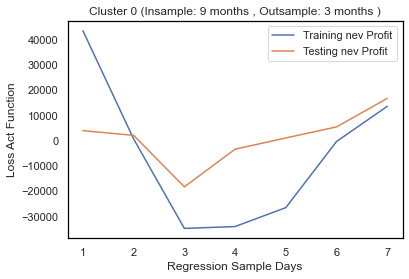

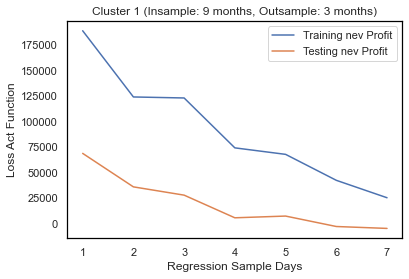

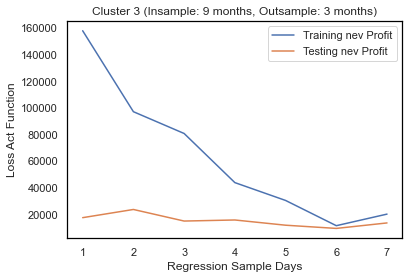

In [264]:
import matplotlib.pyplot as plt
epochs = len(coin1_train)
x_axis = range(1, epochs+1)
# plot Loss Function sample for best coin under cluster 0.
fig, ax = plt.subplots()
ax.plot(x_axis, coin0_train_loss, label='Training nev Profit')
ax.plot(x_axis, coin0_test_loss, label='Testing nev Profit')
ax.legend()
plt.ylabel('Loss Act Function')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 0 (Insample: 9 months , Outsample: 3 months )')
plt.show()
# plot Loss Function sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin1_train_loss, label='Training nev Profit')
ax.plot(x_axis, coin1_test_loss, label='Testing nev Profit')
ax.legend()
plt.ylabel('Loss Act Function')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 1 (Insample: 9 months, Outsample: 3 months)')
plt.show()
# plot Loss Function sample for best coin under cluster 3.
fig, ax = plt.subplots()
ax.plot(x_axis, coin3_train_loss, label='Training nev Profit')
ax.plot(x_axis, coin3_test_loss, label='Testing nev Profit')
ax.legend()
plt.ylabel('Loss Act Function')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 3 (Insample: 9 months, Outsample: 3 months)')
plt.show()

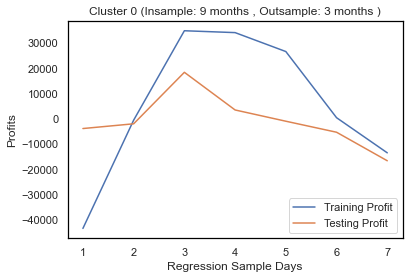

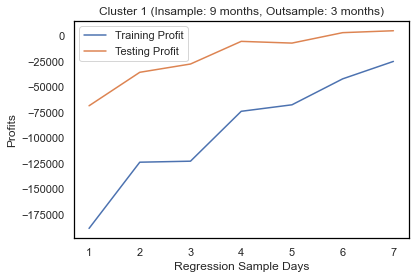

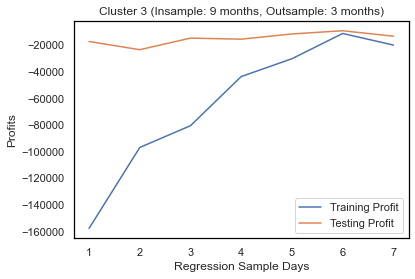

In [261]:
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})


epochs = len(coin1_train)
x_axis = range(1, epochs+1)
# plot Profits sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin0_train, label='Training Profit')
ax.plot(x_axis, coin0_test, label='Testing Profit')
ax.legend()
plt.ylabel('Profits')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 0 (Insample: 9 months , Outsample: 3 months )')
plt.show()
# plot Profits sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin1_train, label='Training Profit')
ax.plot(x_axis, coin1_test, label='Testing Profit')
ax.legend()
plt.ylabel('Profits')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 1 (Insample: 9 months, Outsample: 3 months)')
plt.show()

fig, ax = plt.subplots()
ax.plot(x_axis, coin3_train, label='Training Profit')
ax.plot(x_axis, coin3_test, label='Testing Profit')
ax.legend()
plt.ylabel('Profits')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 3 (Insample: 9 months, Outsample: 3 months)')
plt.show()

For coin 1 and coin2: Day 2 regression sample is best.


In [ ]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 1 training")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl1_train_time,pnl1_train)

In [ ]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 1 testing")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl1_test_time,pnl1_test)

In [ ]:
len(pnl1_test)

In [ ]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 2 training")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl2_train_time,pnl2_train)

In [ ]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 2 testing")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl2_test_time,pnl2_test)

In [270]:
class Run_trade:
    def __init__(self, da1,coin, rolling_days,level=0):
        self.level = level
        self.coin= coin
        self.da1 = da1
        self.entry_time=[]                          #Trade entry time
        self.exit_time=[]                           #Trade exit time
        self.signal_entry=[]                        #Entry trade signal
        self.signal_exit=[]                         #Exit trade signal
        self.entry_spread=[]                        #Storing entering original spread.
        self.exit_spread=[]                         #Storing exiting original spread.
        self.p1=[]
        self.p1_exit=[]
        self.p2=[]
        self.p2_exit=[]
        self.p1_quant=[]
        self.p2_quant=[]
        self.p1_entry_dir=[]
        self.p2_entry_dir=[]
        self.hedge_ratio=[]
        self.pnl1=[]
        self.pnl2=[]
        self.pnl=[]
        self.total_pnl=[]
        self.rolling_days =rolling_days



        self.capital=[]
        self.cap = 1e5
        
    def zscore(self, series):
        return (series - series.mean())/np.std(series)
        #return (series - da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid].mean())/np.std(da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid])
    
    def level_crosses(self, series, level):
        change = 0
        if series[1]>level and series[0]<level:
            change=1
        elif series[1]<level and series[0]>level:
            change=-1
        else:
            change=0
        return change

    def run(self):
        #st = datetime.datetime(2021, 12, 10 , 0, 0)
        #en = en_mid
        st = en_mid
        en= en_last                                      #end date
        en1=st+datetime.timedelta(days=self.rolling_days)               #rolling end date

        entry_level=0
        open_pos=False
        coin1_dir = None

        while(en1<en-datetime.timedelta(minutes=5)):
            #Data Loading and Regression in every 5 min
            data=self.da1[st:en1]
            r=sm.OLS(data[self.coin[0]],data[self.coin[1]]).fit() #(MANA,ADA)
            hedge=r.params
            data['spread']=data[self.coin[0]]-data[self.coin[1]]*hedge[0]
            data['n_spread']= self.zscore(data['spread'])

            upper_trading=self.level_crosses(data['n_spread'].tail(2), level=1)
            lower_trading=self.level_crosses(data['n_spread'].tail(2), level=-1)
            upper_stop=self.level_crosses(data['n_spread'].tail(2), level=2)
            lower_stop=self.level_crosses(data['n_spread'].tail(2), level=-2)
            mean=self.level_crosses(data['n_spread'].tail(2), level=0)


            #Trading signals
            if open_pos==True:

                if (upper_stop == 1 and f==1) or (lower_stop == -1 and f==-1):
                    open_pos=False
                    self.signal_exit.append('Stop Loss Hit')
                    #profits.append(-abs(data['spread'].tail(1)[0]-entry_level)*Qt)
                    #profits_per.append(-abs(data['spread'].tail(1)[0]-entry_level))
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.cap=self.cap+profits[-1]
                    #self.capital.append(self.cap+cum_profits[-1])
                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    print("Time : ", self.exit_time[-1])
                    print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')

                elif mean!=0:
                    open_pos=False
                    self.signal_exit.append('Target Hit')
                    #profits.append(abs(data['spread'].tail(1)[0] - entry_level)*Qt)
                    #profits_per.append(abs(data['spread'].tail(1)[0] - entry_level))
                    #self.cap=self.cap+profits[-1]
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.capital.append(self.cap+cum_profits[-1])

                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    print("Time : ", self.exit_time[-1])
                    print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')
                    #print(data['n_spread'].tail(2))

                    #print("MANA exit price is {0} and ADA is {1} with mean {2} ".format(self.p1_exit[-1],self.p2_exit[-1],mean))


            else:
                if(upper_trading==-1 or lower_trading==1):
                    open_pos=True
                    #self.p1.append(data[''])
                    self.p1.append(data[self.coin[0]].tail(1)[0])
                    self.p2.append(data[self.coin[1]].tail(1)[0])
                   # print("MANA entry price is {0} and ADA is {1}".format(self.p1[-1],self.p2[-1]))
                    entry_level= data['spread'].tail(1)[0]
                    self.entry_time.append(data['n_spread'].tail(1).index[0])
                    #Qt1= int(np.floor((self.cap/2)/data[coin[0]].tail(1)[0]))
                    Qt1=(self.cap/((hedge[0])*self.p2[-1]+self.p1[-1]))
                    self.p1_quant.append(Qt1)
                    Qt2=(Qt1*(hedge[0]))
                    self.p2_quant.append(Qt2)
                    #Qt2= int(np.floor((self.cap/2)/data[coin[1]].tail(1)[0]))
                    #quantity.append((Qt1,Qt2))
                    #print(data['n_spread'].tail(2))
                    self.hedge_ratio.append(hedge[0])

                    self.entry_spread.append(data['spread'].tail(1)[0])
                    if upper_trading == -1:
                        self.signal_entry.append('Short Activate')
                        self.p1_entry_dir.append('Sell')
                        self.p2_entry_dir.append('Buy')

                        print('Hedge Ratio : ', hedge[0])
                        print("Time : ", data['n_spread'].tail(1).index[0])
                        print(f'====>Bought {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        print(f'-----Sold {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'sell'
                        f=1
                        #print("Hedge ratio is" hedge[0])

                    else:
                        self.signal_entry.append('Buy Activate')
                        self.p1_entry_dir.append('Buy')
                        self.p2_entry_dir.append('Sell')

                        print('Hedge Ratio : ', hedge[0])
                        print("Time : ", data['n_spread'].tail(1).index[0])
                        print(f'====>Sold {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        print(f'-----Bought {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'buy'
                        f=-1
                        #print("Hedge ratio is ",hedge[0])

            #Time shift by 5 min

            st=st+datetime.timedelta(minutes=5)
            en1=en1+datetime.timedelta(minutes=5)
        if(open_pos==True):
            self.exit_time.append("NA")
            self.signal_exit.append("NA")
            self.p1_exit.append("NA")
            self.p2_exit.append("NA")
            self.exit_spread.append('NA')
            self.pnl1.append('NA')
            self.pnl2.append('NA')
            self.total_pnl.append(self.total_pnl[-1])
        return self.total_pnl, self.entry_time
        

In [266]:
#(BAT, ENJ)
coin0=['UNI', 'MATIC']
trade1 = Run_trade(da_1[st:en_mid],coin0,3)
pnl0_train, pnl0_train_time= trade1.run()

Hedge Ratio :  7.455263835145405
Time :  2021-12-13 00:45:00
====>Bought MATIC at price 2.111, quantity : 23401.49832542842
-----Sold UNI at price 16.12, quantity : 3138.9228929913525
Time :  2021-12-13 12:50:00
====>Exiting MATIC at price 1.942, quantity : 23401.49832542842
-----Exiting UNI at price 15.4, quantity : 3138.9228929913525
self.pnl1 : 2260.024482953776 , self.pnl2 : -3954.853216997409, pnl : -1694.8287340436332, total_pnl : -1694.8287340436332 
Hedge Ratio :  7.563610862592324
Time :  2021-12-13 22:25:00
====>Bought MATIC at price 1.876, quantity : 26217.627305717644
-----Sold UNI at price 14.66, quantity : 3466.2845275902932
Time :  2021-12-14 00:40:00
====>Exiting MATIC at price 1.789, quantity : 26217.627305717644
-----Exiting UNI at price 14.52, quantity : 3466.2845275902932
self.pnl1 : 485.27983386264304 , self.pnl2 : -2280.9335755974344, pnl : -1795.6537417347913, total_pnl : -3490.4824757784245 
Hedge Ratio :  7.597922725107364
Time :  2021-12-14 01:00:00
====>Bough

Hedge Ratio :  6.341648932847649
Time :  2021-12-23 16:45:00
====>Bought MATIC at price 2.531, quantity : 19345.670870485188
-----Sold UNI at price 16.73, quantity : 3050.5742394980266
Time :  2021-12-23 20:05:00
====>Exiting MATIC at price 2.522, quantity : 19345.670870485188
-----Exiting UNI at price 17.35, quantity : 3050.5742394980266
self.pnl1 : -1891.3560284887794 , self.pnl2 : -174.1110378343733, pnl : -2065.4670663231527, total_pnl : 48.06852662910205 
Hedge Ratio :  6.353455086983277
Time :  2021-12-23 23:45:00
====>Bought MATIC at price 2.727, quantity : 17985.27459701472
-----Sold UNI at price 18.0, quantity : 2830.7864541078256
Time :  2021-12-24 05:25:00
====>Exiting MATIC at price 2.631, quantity : 17985.27459701472
-----Exiting UNI at price 18.19, quantity : 2830.7864541078256
self.pnl1 : -537.8494262804905 , self.pnl2 : -1726.5863613134145, pnl : -2264.435787593905, total_pnl : -2216.367260964803 
Hedge Ratio :  6.5620177183742605
Time :  2021-12-25 09:20:00
====>Bought

Hedge Ratio :  7.580354076681318
Time :  2022-01-09 22:45:00
====>Bought MATIC at price 2.1, quantity : 23659.9605169955
-----Sold UNI at price 16.12, quantity : 3121.2210244608837
Time :  2022-01-10 00:15:00
====>Exiting MATIC at price 2.121, quantity : 23659.9605169955
-----Exiting UNI at price 16.08, quantity : 3121.2210244608837
self.pnl1 : 124.84884097844377 , self.pnl2 : 496.8591708569033, pnl : 621.7080118353471, total_pnl : -6536.825584447508 
Hedge Ratio :  7.582298854486325
Time :  2022-01-10 01:20:00
====>Sold MATIC at price 2.157, quantity : 23326.548250896867
-----Bought UNI at price 16.15, quantity : 3076.4480137966234
Time :  2022-01-10 13:30:00
====>Exiting MATIC at price 2.118, quantity : 23326.548250896867
-----Exiting UNI at price 16.06, quantity : 3076.4480137966234
self.pnl1 : -276.8803212416957 , self.pnl2 : 909.7353817849812, pnl : 632.8550605432855, total_pnl : -5903.970523904222 
Hedge Ratio :  7.579192555739454
Time :  2022-01-10 15:20:00
====>Bought MATIC at 

Hedge Ratio :  7.5543686774557735
Time :  2022-01-20 20:50:00
====>Sold MATIC at price 2.184, quantity : 23138.315297154117
-----Bought UNI at price 16.15, quantity : 3062.9052254498706
Time :  2022-01-21 08:45:00
====>Exiting MATIC at price 1.859, quantity : 23138.315297154117
-----Exiting UNI at price 14.08, quantity : 3062.9052254498706
self.pnl1 : -6340.213816681227 , self.pnl2 : 7519.952471575092, pnl : 1179.7386548938648, total_pnl : -4548.60564011438 
Hedge Ratio :  7.535824058650216
Time :  2022-01-21 09:25:00
====>Sold MATIC at price 1.917, quantity : 26371.003580342647
-----Bought UNI at price 14.13, quantity : 3499.4186933109086
Time :  2022-01-21 15:55:00
====>Exiting MATIC at price 1.906, quantity : 26371.003580342647
-----Exiting UNI at price 14.33, quantity : 3499.4186933109086
self.pnl1 : 699.8837386621792 , self.pnl2 : 290.0810393837723, pnl : 989.9647780459516, total_pnl : -3558.6408620684265 
Hedge Ratio :  7.487251112880518
Time :  2022-01-21 17:30:00
====>Bought MA

Hedge Ratio :  7.436481568081573
Time :  2022-01-22 18:10:00
====>Sold MATIC at price 1.599, quantity : 31455.954995155684
-----Bought UNI at price 11.75, quantity : 4229.951315978389
Time :  2022-01-22 18:20:00
====>Exiting MATIC at price 1.583, quantity : 31455.954995155684
-----Exiting UNI at price 11.78, quantity : 4229.951315978389
self.pnl1 : 126.89853947934897 , self.pnl2 : 503.2952799224914, pnl : 630.1938194018403, total_pnl : -1082.883924028707 
Hedge Ratio :  7.435762618396612
Time :  2022-01-22 18:40:00
====>Sold MATIC at price 1.618, quantity : 31084.581540067815
-----Bought UNI at price 11.89, quantity : 4180.416069652671
Time :  2022-01-22 20:05:00
====>Exiting MATIC at price 1.547, quantity : 31084.581540067815
-----Exiting UNI at price 11.54, quantity : 4180.416069652671
self.pnl1 : -1463.1456243784407 , self.pnl2 : 2207.00528934482, pnl : 743.8596649663793, total_pnl : -339.0242590623277 
Hedge Ratio :  7.433708513155352
Time :  2022-01-22 21:35:00
====>Sold MATIC at 

Time :  2022-01-25 08:20:00
====>Exiting MATIC at price 1.468, quantity : 33193.16051089242
-----Exiting UNI at price 10.67, quantity : 4561.907131816995
self.pnl1 : -1003.6195689997419 , self.pnl2 : 1593.2717045228376, pnl : 589.6521355230957, total_pnl : 6061.842647382322 
Hedge Ratio :  7.2464364193248745
Time :  2022-01-25 09:55:00
====>Bought MATIC at price 1.444, quantity : 34337.02846055724
-----Sold UNI at price 10.64, quantity : 4738.470949525878
Time :  2022-01-25 15:25:00
====>Exiting MATIC at price 1.485, quantity : 34337.02846055724
-----Exiting UNI at price 10.75, quantity : 4738.470949525878
self.pnl1 : -521.2318044478438 , self.pnl2 : 1407.8181668828518, pnl : 886.5863624350079, total_pnl : 6948.42900981733 
Hedge Ratio :  7.234813209949853
Time :  2022-01-25 20:35:00
====>Sold MATIC at price 1.468, quantity : 34206.01317529432
-----Bought UNI at price 10.53, quantity : 4727.974611459445
Time :  2022-01-25 22:35:00
====>Exiting MATIC at price 1.525, quantity : 34206.013

Hedge Ratio :  6.739045585620229
Time :  2022-02-05 22:40:00
====>Sold MATIC at price 1.696, quantity : 29622.93191038875
-----Bought UNI at price 11.32, quantity : 4395.71620847886
Time :  2022-02-06 04:55:00
====>Exiting MATIC at price 1.721, quantity : 29622.93191038875
-----Exiting UNI at price 11.28, quantity : 4395.71620847886
self.pnl1 : -175.82864833915846 , self.pnl2 : -740.5732977597227, pnl : -916.4019460988811, total_pnl : -5897.721818486814 
Hedge Ratio :  6.7009239331087675
Time :  2022-02-06 09:25:00
====>Sold MATIC at price 1.731, quantity : 29009.208625323536
-----Bought UNI at price 11.5, quantity : 4329.135640831735
Time :  2022-02-06 18:30:00
====>Exiting MATIC at price 1.711, quantity : 29009.208625323536
-----Exiting UNI at price 11.44, quantity : 4329.135640831735
self.pnl1 : -259.74813844990626 , self.pnl2 : 580.1841725064712, pnl : 320.43603405656495, total_pnl : -5577.285784430249 
Hedge Ratio :  6.6731244053012295
Time :  2022-02-06 19:50:00
====>Sold MATIC a

Time :  2022-02-12 08:30:00
====>Exiting MATIC at price 1.719, quantity : 28573.86275747557
-----Exiting UNI at price 10.96, quantity : 4654.3285958060305
self.pnl1 : -558.5194314967283 , self.pnl2 : -428.60794136213076, pnl : -987.1273728588591, total_pnl : 2367.89414154691 
Hedge Ratio :  6.148081240424167
Time :  2022-02-12 16:45:00
====>Bought MATIC at price 1.693, quantity : 29236.618479359637
-----Sold UNI at price 10.62, quantity : 4755.405359175532
Time :  2022-02-12 23:20:00
====>Exiting MATIC at price 1.758, quantity : 29236.618479359637
-----Exiting UNI at price 10.81, quantity : 4755.405359175532
self.pnl1 : -903.5270182433571 , self.pnl2 : 1900.3802011583748, pnl : 996.8531829150177, total_pnl : 3364.7473244619277 
Hedge Ratio :  6.154917907852848
Time :  2022-02-13 00:45:00
====>Bought MATIC at price 1.726, quantity : 28663.002872659643
-----Sold UNI at price 10.85, quantity : 4656.926916293961
Time :  2022-02-13 05:50:00
====>Exiting MATIC at price 1.72, quantity : 28663

Hedge Ratio :  6.1693021295131825
Time :  2022-02-18 05:10:00
====>Bought MATIC at price 1.664, quantity : 29881.750333601372
-----Sold UNI at price 10.38, quantity : 4843.61921434367
Time :  2022-02-18 06:50:00
====>Exiting MATIC at price 1.688, quantity : 29881.750333601372
-----Exiting UNI at price 10.37, quantity : 4843.61921434367
self.pnl1 : 48.43619214344427 , self.pnl2 : 717.1620080064336, pnl : 765.5982001498778, total_pnl : 1736.8676157269474 
Hedge Ratio :  6.15269653761238
Time :  2022-02-18 12:50:00
====>Bought MATIC at price 1.698, quantity : 29316.314036918426
-----Sold UNI at price 10.54, quantity : 4764.791154204224
Time :  2022-02-18 14:55:00
====>Exiting MATIC at price 1.707, quantity : 29316.314036918426
-----Exiting UNI at price 10.7, quantity : 4764.791154204224
self.pnl1 : -762.3665846726765 , self.pnl2 : 263.8468263322693, pnl : -498.5197583404072, total_pnl : 1238.3478573865405 
Hedge Ratio :  6.160329511277055
Time :  2022-02-18 20:10:00
====>Bought MATIC at p

Hedge Ratio :  6.118472213693985
Time :  2022-02-22 23:20:00
====>Bought MATIC at price 1.418, quantity : 35151.5251277534
-----Sold UNI at price 8.73, quantity : 5745.147464930777
Time :  2022-02-22 23:50:00
====>Exiting MATIC at price 1.421, quantity : 35151.5251277534
-----Exiting UNI at price 8.69, quantity : 5745.147464930777
self.pnl1 : 229.80589859723636 , self.pnl2 : 105.45457538326419, pnl : 335.26047398050054, total_pnl : 316.8533681987451 
Hedge Ratio :  6.118048628877364
Time :  2022-02-23 00:10:00
====>Bought MATIC at price 1.421, quantity : 35052.92355418822
-----Sold UNI at price 8.76, quantity : 5729.428724828603
Time :  2022-02-23 00:30:00
====>Exiting MATIC at price 1.428, quantity : 35052.92355418822
-----Exiting UNI at price 8.69, quantity : 5729.428724828603
self.pnl1 : 401.0600107380038 , self.pnl2 : 245.3704648793139, pnl : 646.4304756173177, total_pnl : 963.2838438160629 
Hedge Ratio :  6.1165385033290125
Time :  2022-02-23 01:25:00
====>Sold MATIC at price 1.45

Hedge Ratio :  6.040196374864921
Time :  2022-02-24 19:40:00
====>Bought MATIC at price 1.292, quantity : 38438.474311430095
-----Sold UNI at price 7.91, quantity : 6363.778911457942
Time :  2022-02-24 19:45:00
====>Exiting MATIC at price 1.326, quantity : 38438.474311430095
-----Exiting UNI at price 7.88, quantity : 6363.778911457942
self.pnl1 : 190.91336734373985 , self.pnl2 : 1306.9081265886243, pnl : 1497.821493932364, total_pnl : 209.17425467283124 
Hedge Ratio :  6.039883085915247
Time :  2022-02-24 19:50:00
====>Sold MATIC at price 1.317, quantity : 38191.99561650937
-----Bought UNI at price 7.86, quantity : 6323.300480032717
Time :  2022-02-24 19:55:00
====>Exiting MATIC at price 1.315, quantity : 38191.99561650937
-----Exiting UNI at price 8.03, quantity : 6323.300480032717
self.pnl1 : 1074.9610816055558 , self.pnl2 : 76.3839912330188, pnl : 1151.3450728385747, total_pnl : 1360.519327511406 
Hedge Ratio :  6.0400421398426145
Time :  2022-02-24 20:30:00
====>Bought MATIC at pri

Time :  2022-02-26 17:00:00
====>Exiting MATIC at price 1.546, quantity : 32628.699981453272
-----Exiting UNI at price 9.07, quantity : 5425.496404423332
self.pnl1 : -542.5496404423312 , self.pnl2 : -195.7721998887198, pnl : -738.321840331051, total_pnl : 1266.9553415213009 
Hedge Ratio :  6.014938831134888
Time :  2022-02-26 17:10:00
====>Sold MATIC at price 1.533, quantity : 32795.21958228348
-----Bought UNI at price 9.12, quantity : 5452.294778548186
Time :  2022-02-26 23:35:00
====>Exiting MATIC at price 1.512, quantity : 32795.21958228348
-----Exiting UNI at price 9.11, quantity : 5452.294778548186
self.pnl1 : -54.522947785480696 , self.pnl2 : 688.69961122795, pnl : 634.1766634424692, total_pnl : 1901.1320049637702 
Hedge Ratio :  6.017307708280987
Time :  2022-02-26 23:55:00
====>Sold MATIC at price 1.514, quantity : 33171.11401443727
-----Bought UNI at price 9.03, quantity : 5512.617207324691
Time :  2022-02-27 00:50:00
====>Exiting MATIC at price 1.53, quantity : 33171.11401443

Hedge Ratio :  5.935940978727926
Time :  2022-03-08 01:45:00
====>Sold MATIC at price 1.399, quantity : 35965.849457474236
-----Bought UNI at price 8.2, quantity : 6058.997147438236
Time :  2022-03-08 05:05:00
====>Exiting MATIC at price 1.416, quantity : 35965.849457474236
-----Exiting UNI at price 8.4, quantity : 6058.997147438236
self.pnl1 : 1211.7994294876537 , self.pnl2 : -611.4194407770585, pnl : 600.3799887105952, total_pnl : 1434.093046176392 
Hedge Ratio :  5.927059829410768
Time :  2022-03-08 08:05:00
====>Sold MATIC at price 1.46, quantity : 34352.78235812122
-----Bought UNI at price 8.6, quantity : 5795.922995016631
Time :  2022-03-08 09:45:00
====>Exiting MATIC at price 1.453, quantity : 34352.78235812122
-----Exiting UNI at price 8.61, quantity : 5795.922995016631
self.pnl1 : 57.959229950165074 , self.pnl2 : 240.46947650684496, pnl : 298.42870645701004, total_pnl : 1732.5217526334018 
Hedge Ratio :  5.91959966010749
Time :  2022-03-08 12:10:00
====>Sold MATIC at price 1.4

Hedge Ratio :  6.081815611310801
Time :  2022-03-12 08:20:00
====>Bought MATIC at price 1.424, quantity : 34951.948008637475
-----Sold UNI at price 8.74, quantity : 5746.9595006522
Time :  2022-03-12 08:30:00
====>Exiting MATIC at price 1.423, quantity : 34951.948008637475
-----Exiting UNI at price 8.83, quantity : 5746.9595006522
self.pnl1 : -517.2263550586972 , self.pnl2 : -34.95194800863363, pnl : -552.1783030673308, total_pnl : 705.5655969207046 
Hedge Ratio :  6.093003185660435
Time :  2022-03-12 17:30:00
====>Bought MATIC at price 1.415, quantity : 35155.45799999659
-----Sold UNI at price 8.71, quantity : 5769.807913892631
Time :  2022-03-12 20:00:00
====>Exiting MATIC at price 1.415, quantity : 35155.45799999659
-----Exiting UNI at price 8.6, quantity : 5769.807913892631
self.pnl1 : 634.6788705281964 , self.pnl2 : 0.0, pnl : 634.6788705281964, total_pnl : 1340.2444674489016 
Hedge Ratio :  6.095415925538579
Time :  2022-03-12 20:45:00
====>Sold MATIC at price 1.416, quantity : 3

Time :  2022-03-19 17:15:00
====>Exiting MATIC at price 1.513, quantity : 32536.526398541246
-----Exiting UNI at price 9.61, quantity : 5129.125809319829
self.pnl1 : 1025.8251618639713 , self.pnl2 : -455.51136957957783, pnl : 570.3137922843935, total_pnl : 1706.6456571275778 
Hedge Ratio :  6.359921151639031
Time :  2022-03-19 20:30:00
====>Bought MATIC at price 1.533, quantity : 32482.121515827166
-----Sold UNI at price 9.83, quantity : 5107.315128813526
Time :  2022-03-20 01:55:00
====>Exiting MATIC at price 1.53, quantity : 32482.121515827166
-----Exiting UNI at price 9.75, quantity : 5107.315128813526
self.pnl1 : 408.58521030508246 , self.pnl2 : -97.44636454747798, pnl : 311.1388457576045, total_pnl : 2017.7845028851823 
Hedge Ratio :  6.382783828681388
Time :  2022-03-20 07:10:00
====>Sold MATIC at price 1.513, quantity : 33196.72019543645
-----Bought UNI at price 9.57, quantity : 5200.978301390245
Time :  2022-03-20 07:45:00
====>Exiting MATIC at price 1.507, quantity : 33196.720

Hedge Ratio :  6.5116486869307995
Time :  2022-03-25 06:30:00
====>Bought MATIC at price 1.628, quantity : 30569.736974714942
-----Sold UNI at price 10.7, quantity : 4694.623196744307
Time :  2022-03-25 08:35:00
====>Exiting MATIC at price 1.627, quantity : 30569.736974714942
-----Exiting UNI at price 10.86, quantity : 4694.623196744307
self.pnl1 : -751.1397114790898 , self.pnl2 : -30.569736974711574, pnl : -781.7094484538013, total_pnl : 6972.132159604949 
Hedge Ratio :  6.53548954561687
Time :  2022-03-25 19:00:00
====>Bought MATIC at price 1.657, quantity : 29980.264016320856
-----Sold UNI at price 10.97, quantity : 4587.301962165573
Time :  2022-03-25 19:35:00
====>Exiting MATIC at price 1.649, quantity : 29980.264016320856
-----Exiting UNI at price 11.1, quantity : 4587.301962165573
self.pnl1 : -596.3492550815199 , self.pnl2 : -239.84211213056707, pnl : -836.191367212087, total_pnl : 6135.940792392861 
Hedge Ratio :  6.539790766074104
Time :  2022-03-25 21:25:00
====>Bought MATIC 

Hedge Ratio :  6.631125986107524
Time :  2022-03-29 21:35:00
====>Bought MATIC at price 1.68, quantity : 29735.6020638723
-----Sold UNI at price 11.16, quantity : 4484.246284291625
Time :  2022-03-29 22:30:00
====>Exiting MATIC at price 1.677, quantity : 29735.6020638723
-----Exiting UNI at price 11.37, quantity : 4484.246284291625
self.pnl1 : -941.691719701237 , self.pnl2 : -89.20680619161368, pnl : -1030.8985258928508, total_pnl : 7728.342663350763 
Hedge Ratio :  6.633276968860908
Time :  2022-03-29 22:45:00
====>Bought MATIC at price 1.674, quantity : 29726.833215418097
-----Sold UNI at price 11.21, quantity : 4481.470222782345
Time :  2022-03-30 01:40:00
====>Exiting MATIC at price 1.693, quantity : 29726.833215418097
-----Exiting UNI at price 11.22, quantity : 4481.470222782345
self.pnl1 : -44.8147022278225 , self.pnl2 : 564.8098310929477, pnl : 519.9951288651251, total_pnl : 8248.33779221589 
Hedge Ratio :  6.642444760269785
Time :  2022-03-30 03:45:00
====>Bought MATIC at price

Hedge Ratio :  7.034371266643375
Time :  2022-04-06 12:35:00
====>Sold MATIC at price 1.583, quantity : 31750.12945867676
-----Bought UNI at price 11.02, quantity : 4513.570332750879
Time :  2022-04-06 15:40:00
====>Exiting MATIC at price 1.568, quantity : 31750.12945867676
-----Exiting UNI at price 10.74, quantity : 4513.570332750879
self.pnl1 : -1263.7996931702432 , self.pnl2 : 476.2519418801483, pnl : -787.547751290095, total_pnl : 7866.198337636701 
Hedge Ratio :  7.02769807959206
Time :  2022-04-06 17:10:00
====>Sold MATIC at price 1.536, quantity : 32756.221701186005
-----Bought UNI at price 10.66, quantity : 4661.017210785956
Time :  2022-04-06 18:30:00
====>Exiting MATIC at price 1.532, quantity : 32756.221701186005
-----Exiting UNI at price 10.77, quantity : 4661.017210785956
self.pnl1 : 512.7118931864526 , self.pnl2 : 131.02488680474414, pnl : 643.7367799911967, total_pnl : 8509.935117627898 
Hedge Ratio :  7.024324142997861
Time :  2022-04-06 19:55:00
====>Sold MATIC at pric

Time :  2022-04-12 16:30:00
====>Exiting MATIC at price 1.4, quantity : 37472.324099609985
-----Exiting UNI at price 9.36, quantity : 5467.327889772132
self.pnl1 : 1312.1586935453129 , self.pnl2 : -2323.2840941758127, pnl : -1011.1254006304998, total_pnl : 2586.069538039478 
Hedge Ratio :  6.813555727160089
Time :  2022-04-13 01:10:00
====>Sold MATIC at price 1.364, quantity : 36942.47584286956
-----Bought UNI at price 9.15, quantity : 5421.908519161301
Time :  2022-04-13 18:15:00
====>Exiting MATIC at price 1.38, quantity : 36942.47584286956
-----Exiting UNI at price 9.38, quantity : 5421.908519161301
self.pnl1 : 1247.0389594071016 , self.pnl2 : -591.0796134859053, pnl : 655.9593459211964, total_pnl : 3242.0288839606746 
Hedge Ratio :  6.734862383944191
Time :  2022-04-14 13:15:00
====>Bought MATIC at price 1.423, quantity : 34925.139783792685
-----Sold UNI at price 9.7, quantity : 5185.724338934331
Time :  2022-04-14 15:15:00
====>Exiting MATIC at price 1.407, quantity : 34925.139783

Hedge Ratio :  6.511066042383749
Time :  2022-04-22 19:40:00
====>Sold MATIC at price 1.401, quantity : 36108.389360170506
-----Bought UNI at price 8.91, quantity : 5545.695455263875
Time :  2022-04-23 06:55:00
====>Exiting MATIC at price 1.389, quantity : 36108.389360170506
-----Exiting UNI at price 8.98, quantity : 5545.695455263875
self.pnl1 : 388.1986818684729 , self.pnl2 : 433.30067232204647, pnl : 821.4993541905194, total_pnl : 1189.0677533415537 
Hedge Ratio :  6.461804007825641
Time :  2022-04-23 09:25:00
====>Bought MATIC at price 1.367, quantity : 36173.657967284526
-----Sold UNI at price 9.03, quantity : 5598.074148252718
Time :  2022-04-23 14:50:00
====>Exiting MATIC at price 1.405, quantity : 36173.657967284526
-----Exiting UNI at price 9.07, quantity : 5598.074148252718
self.pnl1 : -223.9229659301139 , self.pnl2 : 1374.5990027568132, pnl : 1150.6760368266994, total_pnl : 2339.743790168251 
Hedge Ratio :  6.462302412578691
Time :  2022-04-23 17:40:00
====>Bought MATIC at p

Hedge Ratio :  6.560202176802368
Time :  2022-04-30 00:15:00
====>Bought MATIC at price 1.168, quantity : 42592.30959880402
-----Sold UNI at price 7.74, quantity : 6492.530024366527
Time :  2022-04-30 01:35:00
====>Exiting MATIC at price 1.153, quantity : 42592.30959880402
-----Exiting UNI at price 7.56, quantity : 6492.530024366527
self.pnl1 : 1168.6554043859787 , self.pnl2 : -638.8846439820562, pnl : 529.7707604039225, total_pnl : 5718.5280514812675 
Hedge Ratio :  6.56390652606677
Time :  2022-04-30 02:00:00
====>Bought MATIC at price 1.141, quantity : 43586.72301292372
-----Sold UNI at price 7.57, quantity : 6640.363149571205
Time :  2022-04-30 10:05:00
====>Exiting MATIC at price 1.152, quantity : 43586.72301292372
-----Exiting UNI at price 7.76, quantity : 6640.363149571205
self.pnl1 : -1261.6689984185257 , self.pnl2 : 479.45395314215654, pnl : -782.2150452763692, total_pnl : 4936.313006204899 
Hedge Ratio :  6.5883730197627886
Time :  2022-04-30 11:00:00
====>Bought MATIC at pri

Time :  2022-05-08 04:25:00
====>Exiting MATIC at price 1.024, quantity : 47307.83340166015
-----Exiting UNI at price 7.12, quantity : 6933.407845474287
self.pnl1 : 1386.6815690948586 , self.pnl2 : -804.233167828218, pnl : 582.4484012666405, total_pnl : 1727.2962830584488 
Hedge Ratio :  7.006682238440867
Time :  2022-05-08 15:15:00
====>Bought MATIC at price 0.995, quantity : 49757.54135327251
-----Sold UNI at price 7.11, quantity : 7101.441118634859
Time :  2022-05-08 22:20:00
====>Exiting MATIC at price 0.975, quantity : 49757.54135327251
-----Exiting UNI at price 7.23, quantity : 7101.441118634859
self.pnl1 : -852.1729342361838 , self.pnl2 : -995.150827065451, pnl : -1847.323761301635, total_pnl : -120.02747824318658 
Hedge Ratio :  7.053260242402785
Time :  2022-05-08 23:35:00
====>Bought MATIC at price 0.985, quantity : 50174.49504165996
-----Sold UNI at price 7.11, quantity : 7113.659969615323
Time :  2022-05-09 03:50:00
====>Exiting MATIC at price 0.98, quantity : 50174.4950416

Time :  2022-05-16 06:35:00
====>Exiting MATIC at price 0.726, quantity : 69897.0949785051
-----Exiting UNI at price 5.29, quantity : 9250.296390219051
self.pnl1 : -740.0237112175248 , self.pnl2 : -419.382569871031, pnl : -1159.4062810885557, total_pnl : 6373.2404033281055 
Hedge Ratio :  7.526766437034211
Time :  2022-05-16 08:25:00
====>Sold MATIC at price 0.712, quantity : 70746.55149950646
-----Bought UNI at price 5.28, quantity : 9399.32866143019
Time :  2022-05-16 09:35:00
====>Exiting MATIC at price 0.707, quantity : 70746.55149950646
-----Exiting UNI at price 5.13, quantity : 9399.32866143019
self.pnl1 : -1409.899299214532 , self.pnl2 : 353.7327574975326, pnl : -1056.1665417169993, total_pnl : 5317.073861611107 
Hedge Ratio :  7.52028531736976
Time :  2022-05-16 11:20:00
====>Sold MATIC at price 0.692, quantity : 72631.42866948964
-----Bought UNI at price 5.15, quantity : 9658.0682253812
Time :  2022-05-16 14:15:00
====>Exiting MATIC at price 0.679, quantity : 72631.42866948964

Hedge Ratio :  7.488367604152934
Time :  2022-05-19 08:00:00
====>Bought MATIC at price 0.635, quantity : 78452.36895442689
-----Sold UNI at price 4.79, quantity : 10476.564867210633
Time :  2022-05-19 14:10:00
====>Exiting MATIC at price 0.62, quantity : 78452.36895442689
-----Exiting UNI at price 4.86, quantity : 10476.564867210633
self.pnl1 : -733.3595407047472 , self.pnl2 : -1176.7855343164044, pnl : -1910.1450750211516, total_pnl : 11968.33885493061 
Hedge Ratio :  7.519008382844416
Time :  2022-05-19 15:55:00
====>Bought MATIC at price 0.626, quantity : 79256.7538302733
-----Sold UNI at price 4.78, quantity : 10540.851904236171
Time :  2022-05-19 17:20:00
====>Exiting MATIC at price 0.638, quantity : 79256.7538302733
-----Exiting UNI at price 4.99, quantity : 10540.851904236171
self.pnl1 : -2213.5788998895955 , self.pnl2 : 951.0810459632804, pnl : -1262.4978539263152, total_pnl : 10705.841001004294 
Hedge Ratio :  7.530722283034444
Time :  2022-05-19 18:50:00
====>Bought MATIC at

Hedge Ratio :  8.56593788990379
Time :  2022-05-27 05:50:00
====>Sold MATIC at price 0.602, quantity : 84007.00636593117
-----Bought UNI at price 5.04, quantity : 9807.099636450284
Time :  2022-05-27 07:45:00
====>Exiting MATIC at price 0.58, quantity : 84007.00636593117
-----Exiting UNI at price 5.02, quantity : 9807.099636450284
self.pnl1 : -196.1419927290102 , self.pnl2 : 1848.1541400504875, pnl : 1652.0121473214772, total_pnl : 6645.67901035857 
Hedge Ratio :  8.553588022192516
Time :  2022-05-27 08:00:00
====>Bought MATIC at price 0.577, quantity : 86005.29463617278
-----Sold UNI at price 5.01, quantity : 10054.879240504653
Time :  2022-05-27 08:20:00
====>Exiting MATIC at price 0.582, quantity : 86005.29463617278
-----Exiting UNI at price 4.96, quantity : 10054.879240504653
self.pnl1 : 502.74396202523087 , self.pnl2 : 430.0264731808643, pnl : 932.7704352060952, total_pnl : 7578.4494455646645 
Hedge Ratio :  8.548145418629813
Time :  2022-05-27 08:55:00
====>Sold MATIC at price 0.

Time :  2022-06-02 19:15:00
====>Exiting MATIC at price 0.603, quantity : 82559.07963430941
-----Exiting UNI at price 5.2, quantity : 9567.617538335327
self.pnl1 : -382.7047015334134 , self.pnl2 : 82.55907963430948, pnl : -300.14562189910396, total_pnl : 1421.1432058430096 
Hedge Ratio :  8.629082628511613
Time :  2022-06-02 21:40:00
====>Sold MATIC at price 0.61, quantity : 82230.76135676347
-----Bought UNI at price 5.23, quantity : 9529.490549211143
Time :  2022-06-03 12:40:00
====>Exiting MATIC at price 0.605, quantity : 82230.76135676347
-----Exiting UNI at price 5.23, quantity : 9529.490549211143
self.pnl1 : 0.0 , self.pnl2 : 411.1538067838177, pnl : 411.1538067838177, total_pnl : 1832.297012626825 
Hedge Ratio :  8.632684803568962
Time :  2022-06-03 16:40:00
====>Sold MATIC at price 0.587, quantity : 85494.2538685615
-----Bought UNI at price 5.03, quantity : 9903.553276173838
Time :  2022-06-03 17:00:00
====>Exiting MATIC at price 0.587, quantity : 85494.2538685615
-----Exiting U

Hedge Ratio :  8.475498797246063
Time :  2022-06-08 02:50:00
====>Bought MATIC at price 0.624, quantity : 79591.77968750644
-----Sold UNI at price 5.36, quantity : 9390.807737872386
Time :  2022-06-08 04:55:00
====>Exiting MATIC at price 0.621, quantity : 79591.77968750644
-----Exiting UNI at price 5.24, quantity : 9390.807737872386
self.pnl1 : 1126.8969285446874 , self.pnl2 : -238.77533906251952, pnl : 888.1215894821679, total_pnl : 4448.020300001972 
Hedge Ratio :  8.469768309351021
Time :  2022-06-08 07:30:00
====>Sold MATIC at price 0.632, quantity : 79283.46615695025
-----Bought UNI at price 5.33, quantity : 9360.759735235919
Time :  2022-06-08 08:35:00
====>Exiting MATIC at price 0.618, quantity : 79283.46615695025
-----Exiting UNI at price 5.25, quantity : 9360.759735235919
self.pnl1 : -748.8607788188742 , self.pnl2 : 1109.9685261973045, pnl : 361.1077473784303, total_pnl : 4809.128047380403 
Hedge Ratio :  8.462716883415197
Time :  2022-06-08 11:05:00
====>Sold MATIC at price 0

Hedge Ratio :  8.131737819989413
Time :  2022-06-13 14:30:00
====>Bought MATIC at price 0.438, quantity : 114022.41389081345
-----Sold UNI at price 3.57, quantity : 14021.899920398799
Time :  2022-06-13 14:40:00
====>Exiting MATIC at price 0.433, quantity : 114022.41389081345
-----Exiting UNI at price 3.69, quantity : 14021.899920398799
self.pnl1 : -1682.6279904478574 , self.pnl2 : -570.1120694540678, pnl : -2252.740059901925, total_pnl : 2264.0572991082836 
Hedge Ratio :  8.135299226311886
Time :  2022-06-13 15:10:00
====>Bought MATIC at price 0.434, quantity : 114248.2695772186
-----Sold UNI at price 3.59, quantity : 14043.523956403102
Time :  2022-06-13 15:30:00
====>Exiting MATIC at price 0.429, quantity : 114248.2695772186
-----Exiting UNI at price 3.67, quantity : 14043.523956403102
self.pnl1 : -1123.4819165122492 , self.pnl2 : -571.2413478860935, pnl : -1694.7232643983427, total_pnl : 569.3340347099402 
Hedge Ratio :  8.137636475628472
Time :  2022-06-13 15:40:00
====>Bought MAT

Hedge Ratio :  11.09174443343932
Time :  2022-06-22 23:35:00
====>Bought MATIC at price 0.449, quantity : 108954.16383937566
-----Sold UNI at price 5.2, quantity : 9822.996237715444
Time :  2022-06-23 00:15:00
====>Exiting MATIC at price 0.47, quantity : 108954.16383937566
-----Exiting UNI at price 5.21, quantity : 9822.996237715444
self.pnl1 : -98.22996237715235 , self.pnl2 : 2288.0374406268847, pnl : 2189.8074782497324, total_pnl : -3346.4051481171755 
Hedge Ratio :  11.089143120160859
Time :  2022-06-23 05:35:00
====>Sold MATIC at price 0.474, quantity : 107076.77981441286
-----Bought UNI at price 5.1, quantity : 9656.001248621238
Time :  2022-06-23 11:20:00
====>Exiting MATIC at price 0.512, quantity : 107076.77981441286
-----Exiting UNI at price 5.14, quantity : 9656.001248621238
self.pnl1 : 386.2400499448499 , self.pnl2 : -4068.9176329476923, pnl : -3682.6775830028423, total_pnl : -7029.082731120018 
Hedge Ratio :  11.004934861373343
Time :  2022-06-23 13:50:00
====>Sold MATIC at

Time :  2022-07-05 05:10:00
====>Exiting MATIC at price 0.4922, quantity : 103953.91726755028
-----Exiting UNI at price 5.34, quantity : 9990.398633535315
self.pnl1 : -2997.1195900605926 , self.pnl2 : 1517.7271921062343, pnl : -1479.3923979543583, total_pnl : -4166.8266750165785 
Hedge Ratio :  10.423746722206843
Time :  2022-07-05 05:55:00
====>Bought MATIC at price 0.5035, quantity : 98445.37013068372
-----Sold UNI at price 5.34, quantity : 9444.336355655574
Time :  2022-07-05 06:05:00
====>Exiting MATIC at price 0.5169, quantity : 98445.37013068372
-----Exiting UNI at price 5.32, quantity : 9444.336355655574
self.pnl1 : 188.88672711310747 , self.pnl2 : 1319.1679597511695, pnl : 1508.054686864277, total_pnl : -2658.7719881523017 
Hedge Ratio :  10.421945000027005
Time :  2022-07-05 06:20:00
====>Sold MATIC at price 0.5127, quantity : 97553.32679895012
-----Bought UNI at price 5.34, quantity : 9360.376282804922
Time :  2022-07-05 06:35:00
====>Exiting MATIC at price 0.51, quantity : 9

Time :  2022-07-08 06:20:00
====>Exiting MATIC at price 0.588, quantity : 89215.1712147963
-----Exiting UNI at price 5.79, quantity : 8630.105553163077
self.pnl1 : 258.90316659489446 , self.pnl2 : -2167.928660519549, pnl : -1909.0254939246545, total_pnl : 1688.0173716166 
Hedge Ratio :  10.27572371718064
Time :  2022-07-08 14:25:00
====>Sold MATIC at price 0.5595, quantity : 90064.71089792794
-----Bought UNI at price 5.66, quantity : 8764.804638270198
Time :  2022-07-08 14:40:00
====>Exiting MATIC at price 0.5659, quantity : 90064.71089792794
-----Exiting UNI at price 5.61, quantity : 8764.804638270198
self.pnl1 : -438.24023191350835 , self.pnl2 : -576.4141497467353, pnl : -1014.6543816602436, total_pnl : 673.3629899563566 
Hedge Ratio :  10.142841426148333
Time :  2022-07-09 06:05:00
====>Sold MATIC at price 0.5966, quantity : 84585.57267064945
-----Bought UNI at price 5.94, quantity : 8339.435579914234
Time :  2022-07-09 06:25:00
====>Exiting MATIC at price 0.5931, quantity : 84585.5

Time :  2022-07-15 19:40:00
====>Exiting MATIC at price 0.6987, quantity : 71918.71414692774
-----Exiting UNI at price 6.96, quantity : 7215.210641881697
self.pnl1 : 0.0 , self.pnl2 : 467.47164195502677, pnl : 467.47164195502677, total_pnl : 6446.414548510625 
Hedge Ratio :  9.96331610253864
Time :  2022-07-16 00:05:00
====>Sold MATIC at price 0.7045, quantity : 71221.70890222884
-----Bought UNI at price 6.97, quantity : 7148.393985420341
Time :  2022-07-16 00:20:00
====>Exiting MATIC at price 0.7031, quantity : 71221.70890222884
-----Exiting UNI at price 7.04, quantity : 7148.393985420341
self.pnl1 : 500.3875789794259 , self.pnl2 : 99.71039246312522, pnl : 600.097971442551, total_pnl : 7046.512519953176 
Hedge Ratio :  9.962123399373418
Time :  2022-07-16 01:00:00
====>Sold MATIC at price 0.7144, quantity : 70468.73457290797
-----Bought UNI at price 7.02, quantity : 7073.666099873868
Time :  2022-07-16 11:50:00
====>Exiting MATIC at price 0.6873, quantity : 70468.73457290797
-----Exit

Time :  2022-07-25 01:40:00
====>Exiting MATIC at price 0.8863, quantity : 56665.87652817831
-----Exiting UNI at price 6.95, quantity : 7029.85410246084
self.pnl1 : -913.8810333199085 , self.pnl2 : 5.666587652817207, pnl : -908.2144456670914, total_pnl : 17742.018775739783 
Hedge Ratio :  8.06117440913369
Time :  2022-07-25 03:05:00
====>Sold MATIC at price 0.8906, quantity : 56453.63996133067
-----Bought UNI at price 7.1, quantity : 7003.153274709705
Time :  2022-07-25 03:55:00
====>Exiting MATIC at price 0.9092, quantity : 56453.63996133067
-----Exiting UNI at price 7.15, quantity : 7003.153274709705
self.pnl1 : 350.15766373549025 , self.pnl2 : -1050.037703280754, pnl : -699.8800395452637, total_pnl : 17042.13873619452 
Hedge Ratio :  8.05939038461301
Time :  2022-07-25 04:05:00
====>Sold MATIC at price 0.903, quantity : 55629.46219038819
-----Bought UNI at price 7.21, quantity : 6902.440449664279
Time :  2022-07-25 04:10:00
====>Exiting MATIC at price 0.8916, quantity : 55629.462190

Hedge Ratio :  9.219341561155808
Time :  2022-08-02 20:00:00
====>Bought MATIC at price 0.8828, quantity : 56633.9158420164
-----Sold UNI at price 8.14, quantity : 6142.945834725787
Time :  2022-08-02 22:00:00
====>Exiting MATIC at price 0.9026, quantity : 56633.9158420164
-----Exiting UNI at price 8.66, quantity : 6142.945834725787
self.pnl1 : -3194.3318340574065 , self.pnl2 : 1121.3515336719208, pnl : -2072.980300385486, total_pnl : 12204.338552425308 
Hedge Ratio :  9.233729587076617
Time :  2022-08-03 00:40:00
====>Bought MATIC at price 0.888, quantity : 55929.61976149324
-----Sold UNI at price 8.31, quantity : 6057.0995970871245
Time :  2022-08-03 01:10:00
====>Exiting MATIC at price 0.8834, quantity : 55929.61976149324
-----Exiting UNI at price 8.45, quantity : 6057.0995970871245
self.pnl1 : -847.9939435921901 , self.pnl2 : -257.2762509028716, pnl : -1105.2701944950618, total_pnl : 11099.068357930248 
Hedge Ratio :  9.243885435440918
Time :  2022-08-03 03:40:00
====>Bought MATIC 

Hedge Ratio :  9.676476734207228
Time :  2022-08-09 14:40:00
====>Sold MATIC at price 0.9107, quantity : 55129.18305962041
-----Bought UNI at price 8.74, quantity : 5697.237183936351
Time :  2022-08-09 15:45:00
====>Exiting MATIC at price 0.9045, quantity : 55129.18305962041
-----Exiting UNI at price 8.59, quantity : 5697.237183936351
self.pnl1 : -854.5855775904547 , self.pnl2 : 341.8009349696456, pnl : -512.7846426208091, total_pnl : 13243.545863474892 
Hedge Ratio :  9.623675847544387
Time :  2022-08-10 03:00:00
====>Sold MATIC at price 0.893, quantity : 56364.69625915753
-----Bought UNI at price 8.48, quantity : 5856.878094407113
Time :  2022-08-10 10:30:00
====>Exiting MATIC at price 0.8847, quantity : 56364.69625915753
-----Exiting UNI at price 8.5, quantity : 5856.878094407113
self.pnl1 : 117.13756188813977 , self.pnl2 : 467.826978951006, pnl : 584.9645408391458, total_pnl : 13828.510404314038 
Hedge Ratio :  9.577257520583382
Time :  2022-08-10 17:55:00
====>Sold MATIC at price 

Time :  2022-08-18 05:50:00
====>Exiting MATIC at price 0.888, quantity : 56156.51784147985
-----Exiting UNI at price 7.86, quantity : 6303.76097626119
self.pnl1 : 630.3760976261168 , self.pnl2 : 44.92521427318517, pnl : 675.3013118993019, total_pnl : 11890.944710829583 
Hedge Ratio :  8.915658544351277
Time :  2022-08-18 06:35:00
====>Bought MATIC at price 0.8924, quantity : 55805.4101782674
-----Sold UNI at price 8.02, quantity : 6259.258348742417
Time :  2022-08-18 11:45:00
====>Exiting MATIC at price 0.8904, quantity : 55805.4101782674
-----Exiting UNI at price 8.1, quantity : 6259.258348742417
self.pnl1 : -500.7406678993938 , self.pnl2 : -111.61082035653489, pnl : -612.3514882559288, total_pnl : 11278.593222573654 
Hedge Ratio :  8.92306018078346
Time :  2022-08-18 12:50:00
====>Bought MATIC at price 0.9, quantity : 55454.580254946544
-----Sold UNI at price 8.06, quantity : 6214.7491030456695
Time :  2022-08-18 14:50:00
====>Exiting MATIC at price 0.9004, quantity : 55454.58025494

Time :  2022-08-20 19:55:00
====>Exiting MATIC at price 0.7982, quantity : 62034.916807550304
-----Exiting UNI at price 7.15, quantity : 6942.499014541754
self.pnl1 : -69.42499014541606 , self.pnl2 : 775.436460094376, pnl : 706.01146994896, total_pnl : 19671.339126321956 
Hedge Ratio :  8.921363907976872
Time :  2022-08-21 00:15:00
====>Bought MATIC at price 0.7719, quantity : 64570.82446255128
-----Sold UNI at price 6.93, quantity : 7237.774977973545
Time :  2022-08-21 00:30:00
====>Exiting MATIC at price 0.7715, quantity : 64570.82446255128
-----Exiting UNI at price 6.88, quantity : 7237.774977973545
self.pnl1 : 361.88874889867594 , self.pnl2 : -25.828329785024838, pnl : 336.0604191136511, total_pnl : 20007.399545435608 
Hedge Ratio :  8.91909837180568
Time :  2022-08-21 01:40:00
====>Sold MATIC at price 0.7843, quantity : 64095.859628684906
-----Bought UNI at price 6.92, quantity : 7186.36088052347
Time :  2022-08-21 02:10:00
====>Exiting MATIC at price 0.7673, quantity : 64095.8596

Time :  2022-08-26 03:25:00
====>Exiting MATIC at price 0.8174, quantity : 61519.509967910795
-----Exiting UNI at price 7.06, quantity : 7124.55866818163
self.pnl1 : -142.49117336362957 , self.pnl2 : 442.94047176895674, pnl : 300.44929840532717, total_pnl : 26555.97807990284 
Hedge Ratio :  8.641706851488056
Time :  2022-08-26 04:50:00
====>Sold MATIC at price 0.8185, quantity : 61187.862357857404
-----Bought UNI at price 7.05, quantity : 7080.529739020386
Time :  2022-08-26 05:25:00
====>Exiting MATIC at price 0.8133, quantity : 61187.862357857404
-----Exiting UNI at price 7.03, quantity : 7080.529739020386
self.pnl1 : -141.6105947804047 , self.pnl2 : 318.17688426085743, pnl : 176.56628948045272, total_pnl : 26732.544369383293 
Hedge Ratio :  8.64121550843017
Time :  2022-08-26 06:10:00
====>Sold MATIC at price 0.8137, quantity : 61628.95268938588
-----Bought UNI at price 6.99, quantity : 7131.97728135146
Time :  2022-08-26 06:20:00
====>Exiting MATIC at price 0.8151, quantity : 61628

Time :  2022-09-06 15:25:00
====>Exiting MATIC at price 0.8959, quantity : 55754.6379169699
-----Exiting UNI at price 6.48, quantity : 7699.542711431278
self.pnl1 : 384.97713557156254 , self.pnl2 : 228.59401545957618, pnl : 613.5711510311387, total_pnl : 30145.899202002933 
Hedge Ratio :  7.250050535042049
Time :  2022-09-06 22:35:00
====>Bought MATIC at price 0.8574, quantity : 58157.69372294739
-----Sold UNI at price 6.25, quantity : 8021.6949443111835
Time :  2022-09-06 22:40:00
====>Exiting MATIC at price 0.8543, quantity : 58157.69372294739
-----Exiting UNI at price 6.18, quantity : 8021.6949443111835
self.pnl1 : 561.5186461017851 , self.pnl2 : -180.2888505411429, pnl : 381.2297955606422, total_pnl : 30527.128997563574 
Hedge Ratio :  7.250151095951811
Time :  2022-09-06 22:55:00
====>Sold MATIC at price 0.8514, quantity : 58978.944520613055
-----Bought UNI at price 6.12, quantity : 8134.857293325169
Time :  2022-09-07 07:35:00
====>Exiting MATIC at price 0.803, quantity : 58978.9

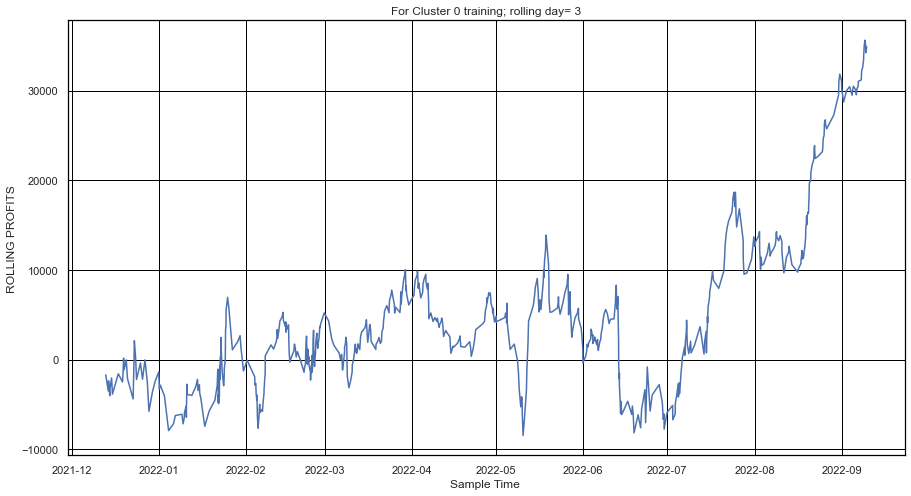

In [269]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 0 training; rolling day= 3")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl0_train_time,pnl0_train)

In [271]:
coin0=['UNI', 'MATIC']
trade2 = Run_trade(da_1[en_mid:en_last],coin0,3)
pnl0_test, pnl0_test_time= trade2.run()

Hedge Ratio :  7.320877539772124
Time :  2022-09-13 12:00:00
====>Sold MATIC at price 0.927, quantity : 54162.71029191617
-----Bought UNI at price 6.73, quantity : 7398.390424872765
Time :  2022-09-13 17:50:00
====>Exiting MATIC at price 0.9083, quantity : 54162.71029191617
-----Exiting UNI at price 6.75, quantity : 7398.390424872765
self.pnl1 : 147.96780849745215 , self.pnl2 : 1012.842682458835, pnl : 1160.8104909562871, total_pnl : 1160.8104909562871 
Hedge Ratio :  7.304217670181615
Time :  2022-09-13 18:00:00
====>Bought MATIC at price 0.8962, quantity : 55988.00662574511
-----Sold UNI at price 6.5, quantity : 7665.161301847266
Time :  2022-09-14 18:05:00
====>Exiting MATIC at price 0.8564, quantity : 55988.00662574511
-----Exiting UNI at price 6.22, quantity : 7665.161301847266
self.pnl1 : 2146.2451645172364 , self.pnl2 : -2228.3226637046523, pnl : -82.07749918741592, total_pnl : 1078.7329917688712 
Hedge Ratio :  7.230785970043006
Time :  2022-09-15 07:55:00
====>Sold MATIC at pr

Time :  2022-09-17 05:50:00
====>Exiting MATIC at price 0.8179, quantity : 62075.41799294908
-----Exiting UNI at price 5.99, quantity : 8674.917693436557
self.pnl1 : -1821.7327156216766 , self.pnl2 : 912.5086444963474, pnl : -909.2240711253291, total_pnl : -1398.4642032702754 
Hedge Ratio :  7.1676031632900035
Time :  2022-09-17 11:15:00
====>Bought MATIC at price 0.8128, quantity : 61283.418792816214
-----Sold UNI at price 5.87, quantity : 8550.057445519416
Time :  2022-09-17 12:35:00
====>Exiting MATIC at price 0.8101, quantity : 61283.418792816214
-----Exiting UNI at price 5.91, quantity : 8550.057445519416
self.pnl1 : -342.00229782077696 , self.pnl2 : -165.46523074059917, pnl : -507.4675285613761, total_pnl : -1905.9317318316516 
Hedge Ratio :  7.171866708848728
Time :  2022-09-17 14:15:00
====>Bought MATIC at price 0.8163, quantity : 61014.34258652997
-----Sold UNI at price 5.9, quantity : 8507.45629603654
Time :  2022-09-17 18:20:00
====>Exiting MATIC at price 0.8138, quantity : 

Hedge Ratio :  7.243629427319818
Time :  2022-09-19 16:30:00
====>Sold MATIC at price 0.7439, quantity : 67391.77757632722
-----Bought UNI at price 5.36, quantity : 9303.592660628767
Time :  2022-09-19 18:45:00
====>Exiting MATIC at price 0.7511, quantity : 67391.77757632722
-----Exiting UNI at price 5.35, quantity : 9303.592660628767
self.pnl1 : -93.03592660629394 , self.pnl2 : -485.22079854955496, pnl : -578.2567251558489, total_pnl : -2938.6812046580244 
Hedge Ratio :  7.240354968200359
Time :  2022-09-19 22:40:00
====>Sold MATIC at price 0.756, quantity : 66281.10832206863
-----Bought UNI at price 5.45, quantity : 9154.400386883692
Time :  2022-09-19 23:50:00
====>Exiting MATIC at price 0.7587, quantity : 66281.10832206863
-----Exiting UNI at price 5.4, quantity : 9154.400386883692
self.pnl1 : -457.72001934418296 , self.pnl2 : -178.95899246958766, pnl : -636.6790118137706, total_pnl : -3575.360216471795 
Hedge Ratio :  7.23739756813327
Time :  2022-09-20 02:45:00
====>Sold MATIC at

Hedge Ratio :  7.670936601300081
Time :  2022-09-24 14:50:00
====>Bought MATIC at price 0.7696, quantity : 64442.41248639941
-----Sold UNI at price 6.0, quantity : 8400.853225077837
Time :  2022-09-24 17:55:00
====>Exiting MATIC at price 0.7784, quantity : 64442.41248639941
-----Exiting UNI at price 5.98, quantity : 8400.853225077837
self.pnl1 : 168.01706450155316 , self.pnl2 : 567.0932298803167, pnl : 735.1102943818698, total_pnl : -5069.310075104918 
Hedge Ratio :  7.7193426299519
Time :  2022-09-25 10:45:00
====>Bought MATIC at price 0.7585, quantity : 65612.0950856724
-----Sold UNI at price 5.91, quantity : 8499.699810070644
Time :  2022-09-25 12:35:00
====>Exiting MATIC at price 0.7646, quantity : 65612.0950856724
-----Exiting UNI at price 5.9, quantity : 8499.699810070644
self.pnl1 : 84.99699810070463 , self.pnl2 : 400.23378002260125, pnl : 485.23077812330587, total_pnl : -4584.079296981612 
Hedge Ratio :  7.719717003168506
Time :  2022-09-25 13:05:00
====>Bought MATIC at price 0

Hedge Ratio :  8.294904953618534
Time :  2022-10-03 03:15:00
====>Sold MATIC at price 0.7778, quantity : 64845.602814450285
-----Bought UNI at price 6.34, quantity : 7817.522102668858
Time :  2022-10-03 11:30:00
====>Exiting MATIC at price 0.7718, quantity : 64845.602814450285
-----Exiting UNI at price 6.42, quantity : 7817.522102668858
self.pnl1 : 625.4017682135092 , self.pnl2 : 389.07361688670204, pnl : 1014.4753851002113, total_pnl : -1798.273083836145 
Hedge Ratio :  8.294031425112232
Time :  2022-10-03 18:45:00
====>Bought MATIC at price 0.7798, quantity : 63713.56332357761
-----Sold UNI at price 6.55, quantity : 7681.856995461705
Time :  2022-10-03 20:15:00
====>Exiting MATIC at price 0.7926, quantity : 63713.56332357761
-----Exiting UNI at price 6.55, quantity : 7681.856995461705
self.pnl1 : 0.0 , self.pnl2 : 815.5336105417884, pnl : 815.5336105417884, total_pnl : -982.7394732943565 
Hedge Ratio :  8.296757235135004
Time :  2022-10-03 21:35:00
====>Sold MATIC at price 0.7965, qu

Hedge Ratio :  7.716215630368906
Time :  2022-10-13 11:55:00
====>Sold MATIC at price 0.7546, quantity : 66791.70071532644
-----Bought UNI at price 5.73, quantity : 8656.01791277743
Time :  2022-10-13 15:45:00
====>Exiting MATIC at price 0.7233, quantity : 66791.70071532644
-----Exiting UNI at price 5.58, quantity : 8656.01791277743
self.pnl1 : -1298.4026869166175 , self.pnl2 : 2090.5802323897174, pnl : 792.1775454730998, total_pnl : -2038.6629565225328 
Hedge Ratio :  7.704459388079718
Time :  2022-10-13 16:10:00
====>Sold MATIC at price 0.7364, quantity : 68462.39521162379
-----Bought UNI at price 5.58, quantity : 8886.073864903266
Time :  2022-10-13 17:40:00
====>Exiting MATIC at price 0.76, quantity : 68462.39521162379
-----Exiting UNI at price 5.7, quantity : 8886.073864903266
self.pnl1 : 1066.328863788393 , self.pnl2 : -1615.7125269943183, pnl : -549.3836632059254, total_pnl : -2588.046619728458 
Hedge Ratio :  7.701304787547299
Time :  2022-10-13 17:50:00
====>Sold MATIC at pric

Hedge Ratio :  7.170315548952622
Time :  2022-10-25 05:35:00
====>Sold MATIC at price 0.8857, quantity : 57085.0977503053
-----Bought UNI at price 6.21, quantity : 7961.309005242287
Time :  2022-10-25 22:25:00
====>Exiting MATIC at price 0.9298, quantity : 57085.0977503053
-----Exiting UNI at price 6.6, quantity : 7961.309005242287
self.pnl1 : 3104.910512044489 , self.pnl2 : -2517.452810788459, pnl : 587.4577012560303, total_pnl : -5797.126174934886 
Hedge Ratio :  7.033946160299877
Time :  2022-10-26 13:55:00
====>Sold MATIC at price 0.9595, quantity : 52456.6241876387
-----Bought UNI at price 6.66, quantity : 7457.638001795897
Time :  2022-10-26 14:00:00
====>Exiting MATIC at price 0.9595, quantity : 52456.6241876387
-----Exiting UNI at price 6.76, quantity : 7457.638001795897
self.pnl1 : 745.7638001795871 , self.pnl2 : 0.0, pnl : 745.7638001795871, total_pnl : -5051.362374755299 
Hedge Ratio :  7.018361058409778
Time :  2022-10-26 19:20:00
====>Bought MATIC at price 0.9512, quantity

Time :  2022-11-09 06:55:00
====>Exiting MATIC at price 1.0312, quantity : 48934.929360441885
-----Exiting UNI at price 6.22, quantity : 8089.571409573381
self.pnl1 : 1698.8099960104098 , self.pnl2 : 919.9766719763148, pnl : 2618.7866679867248, total_pnl : -1125.178866241638 
Hedge Ratio :  5.966263871980046
Time :  2022-11-09 11:15:00
====>Bought MATIC at price 0.9743, quantity : 49998.31078167732
-----Sold UNI at price 6.12, quantity : 8380.170883237217
Time :  2022-11-09 19:55:00
====>Exiting MATIC at price 0.9623, quantity : 49998.31078167732
-----Exiting UNI at price 5.57, quantity : 8380.170883237217
self.pnl1 : 4609.093985780468 , self.pnl2 : -599.9797293801283, pnl : 4009.1142564003394, total_pnl : 2883.935390158702 
Hedge Ratio :  5.896257683389412
Time :  2022-11-10 00:00:00
====>Bought MATIC at price 0.8369, quantity : 58294.64809302073
-----Sold UNI at price 5.18, quantity : 9886.719886283967
Time :  2022-11-10 03:40:00
====>Exiting MATIC at price 0.825, quantity : 58294.64

Time :  2022-11-18 21:30:00
====>Exiting MATIC at price 0.8871, quantity : 56176.86388594067
-----Exiting UNI at price 5.89, quantity : 8452.936959240873
self.pnl1 : 422.64684796204966 , self.pnl2 : 44.94149110875382, pnl : 467.5883390708035, total_pnl : 12862.019110053603 
Hedge Ratio :  6.631836337508905
Time :  2022-11-19 10:40:00
====>Bought MATIC at price 0.857, quantity : 58156.23092022564
-----Sold UNI at price 5.72, quantity : 8769.250017721437
Time :  2022-11-19 20:15:00
====>Exiting MATIC at price 0.8591, quantity : 58156.23092022564
-----Exiting UNI at price 5.83, quantity : 8769.250017721437
self.pnl1 : -964.6175019493609 , self.pnl2 : 122.1280849324733, pnl : -842.4894170168876, total_pnl : 12019.529693036715 
Hedge Ratio :  6.643188863428109
Time :  2022-11-19 21:05:00
====>Bought MATIC at price 0.8724, quantity : 57094.053601415704
-----Sold UNI at price 5.84, quantity : 8594.374595569341
Time :  2022-11-19 23:00:00
====>Exiting MATIC at price 0.871, quantity : 57094.053

Hedge Ratio :  6.6498536032836135
Time :  2022-11-22 03:05:00
====>Sold MATIC at price 0.7851, quantity : 63813.27309307064
-----Bought UNI at price 5.2, quantity : 9596.192172044277
Time :  2022-11-22 03:35:00
====>Exiting MATIC at price 0.7955, quantity : 63813.27309307064
-----Exiting UNI at price 5.16, quantity : 9596.192172044277
self.pnl1 : -383.84768688177144 , self.pnl2 : -663.6580401679324, pnl : -1047.5057270497039, total_pnl : 15088.468104449596 
Hedge Ratio :  6.505929788404916
Time :  2022-11-23 09:30:00
====>Sold MATIC at price 0.8657, quantity : 58442.531390465665
-----Bought UNI at price 5.5, quantity : 8982.963740958885
Time :  2022-11-24 00:30:00
====>Exiting MATIC at price 0.8596, quantity : 58442.531390465665
-----Exiting UNI at price 5.55, quantity : 8982.963740958885
self.pnl1 : 449.14818704794266 , self.pnl2 : 356.4994414818402, pnl : 805.6476285297829, total_pnl : 15894.115732979379 
Hedge Ratio :  6.415640225997242
Time :  2022-11-24 07:40:00
====>Sold MATIC at

Hedge Ratio :  6.436915822808883
Time :  2022-11-28 08:50:00
====>Sold MATIC at price 0.8205, quantity : 61120.659750885476
-----Bought UNI at price 5.25, quantity : 9495.333080837803
Time :  2022-11-28 09:50:00
====>Exiting MATIC at price 0.8212, quantity : 61120.659750885476
-----Exiting UNI at price 5.29, quantity : 9495.333080837803
self.pnl1 : 379.81332323351245 , self.pnl2 : -42.784461825621904, pnl : 337.02886140789053, total_pnl : 19215.90293338177 
Hedge Ratio :  6.433600561711922
Time :  2022-11-28 19:55:00
====>Sold MATIC at price 0.8273, quantity : 60622.75434048001
-----Bought UNI at price 5.29, quantity : 9422.834656733625
Time :  2022-11-28 20:55:00
====>Exiting MATIC at price 0.8173, quantity : 60622.75434048001
-----Exiting UNI at price 5.18, quantity : 9422.834656733625
self.pnl1 : -1036.5118122407018 , self.pnl2 : 606.2275434048006, pnl : -430.28426883590123, total_pnl : 18785.61866454587 
Hedge Ratio :  6.433542127498093
Time :  2022-11-28 21:20:00
====>Sold MATIC a

Hedge Ratio :  6.51985505650706
Time :  2022-12-03 17:05:00
====>Bought MATIC at price 0.924, quantity : 53291.40616117928
-----Sold UNI at price 6.21, quantity : 8173.710258787494
Time :  2022-12-05 19:45:00
====>Exiting MATIC at price 0.9286, quantity : 53291.40616117928
-----Exiting UNI at price 6.28, quantity : 8173.710258787494
self.pnl1 : -572.1597181151269 , self.pnl2 : 245.14046834142135, pnl : -327.01924977370555, total_pnl : 16224.184509402297 
Hedge Ratio :  6.787656260217942
Time :  2022-12-06 00:15:00
====>Sold MATIC at price 0.9188, quantity : 54622.436247433914
-----Bought UNI at price 6.19, quantity : 8047.319156035173
Time :  2022-12-06 00:35:00
====>Exiting MATIC at price 0.9076, quantity : 54622.436247433914
-----Exiting UNI at price 6.19, quantity : 8047.319156035173
self.pnl1 : 0.0 , self.pnl2 : 611.7712859712592, pnl : 611.7712859712592, total_pnl : 16835.955795373557 
Hedge Ratio :  6.788909513921864
Time :  2022-12-06 01:55:00
====>Bought MATIC at price 0.9033, 

Time :  2022-12-07 20:00:00
====>Exiting MATIC at price 0.8875, quantity : 56272.178495297725
-----Exiting UNI at price 6.02, quantity : 8301.102337759965
self.pnl1 : 83.01102337759788 , self.pnl2 : 168.81653548589333, pnl : 251.82755886349122, total_pnl : 19138.409393026075 
Hedge Ratio :  6.7781049616225495
Time :  2022-12-07 21:55:00
====>Sold MATIC at price 0.8868, quantity : 56527.43510857915
-----Bought UNI at price 5.98, quantity : 8339.710793597324
Time :  2022-12-07 22:35:00
====>Exiting MATIC at price 0.8837, quantity : 56527.43510857915
-----Exiting UNI at price 5.99, quantity : 8339.710793597324
self.pnl1 : 83.39710793597146 , self.pnl2 : 175.2350488365949, pnl : 258.63215677256636, total_pnl : 19397.041549798643 
Hedge Ratio :  6.777452967333522
Time :  2022-12-07 23:55:00
====>Sold MATIC at price 0.8888, quantity : 56413.89781744035
-----Bought UNI at price 5.99, quantity : 8323.760871428884
Time :  2022-12-08 01:20:00
====>Exiting MATIC at price 0.8868, quantity : 56413.

Time :  2022-12-12 00:50:00
====>Exiting MATIC at price 0.9085, quantity : 55223.2603758403
-----Exiting UNI at price 6.1, quantity : 8228.093721357163
self.pnl1 : 411.4046860678567 , self.pnl2 : 49.70093433825693, pnl : 461.10562040611364, total_pnl : 18821.55941443093 
Hedge Ratio :  6.70428362995125
Time :  2022-12-12 03:30:00
====>Sold MATIC at price 0.9, quantity : 55804.597949429706
-----Bought UNI at price 5.98, quantity : 8323.722716641016
Time :  2022-12-12 05:55:00
====>Exiting MATIC at price 0.8916, quantity : 55804.597949429706
-----Exiting UNI at price 5.98, quantity : 8323.722716641016
self.pnl1 : 0.0 , self.pnl2 : 468.75862277521367, pnl : 468.75862277521367, total_pnl : 19290.318037206143 
Hedge Ratio :  6.704656448712805
Time :  2022-12-12 08:10:00
====>Sold MATIC at price 0.8768, quantity : 57116.11280505813
-----Bought UNI at price 5.86, quantity : 8518.872404867752
Time :  2022-12-12 09:10:00
====>Exiting MATIC at price 0.8821, quantity : 57116.11280505813
-----Exit

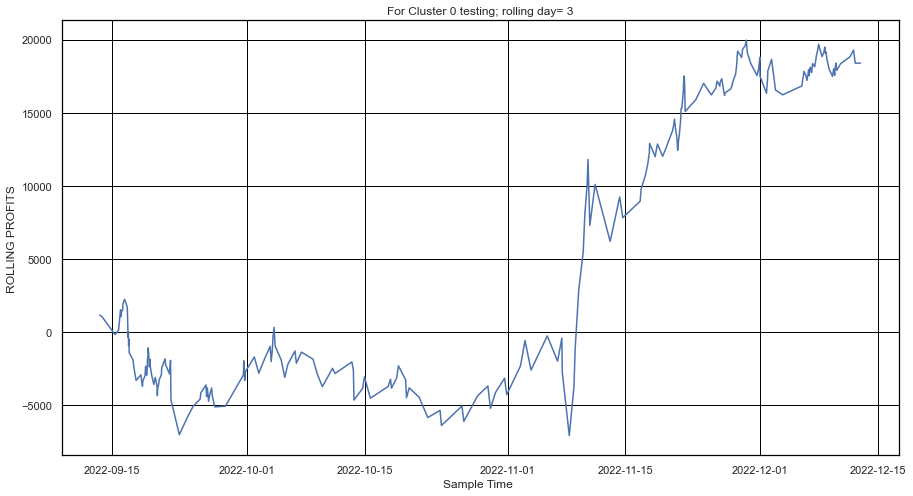

In [272]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 0 testing; rolling day= 3")
plt.xlabel("Sample Time ")
plt.ylabel("ROLLING PROFITS")
plt.plot(pnl0_test_time,pnl0_test)

In [281]:
cap= 1e5
pnl0_train_norm=[]
for i in pnl0_train:
    pnl0_train_norm.append(i+cap)
    
pnl0_test_norm=[]
for i in pnl0_test:
    pnl0_test_norm.append(i+cap)
    
    

In [367]:
len(pnl0_test)

252

In [283]:
pnl0_test_norm[0]

101160.81049095628

In [312]:
train0= pd.DataFrame({'Time':pnl0_train_time, 'Final Cap':pnl0_train_norm})

In [313]:
train0.set_index('Time', inplace=True)

In [314]:
train0['Normalize Profit']=(1+train0['Final Cap'].pct_change()).cumprod()*100

In [315]:
train0

,Final Cap,Normalize Profit
Time,,
2021-12-13 00:45:00,98305.171266,NaN
2021-12-13 22:25:00,96509.517524,98.173388
2021-12-14 01:00:00,97633.852490,99.317107
2021-12-14 11:15:00,95967.174958,97.621696
2021-12-14 13:50:00,96802.493212,98.471415
...,...,...
2022-09-09 01:30:00,135000.437482,137.327910
2022-09-09 06:55:00,135611.614881,137.949625
2022-09-09 13:35:00,135050.369032,137.378703


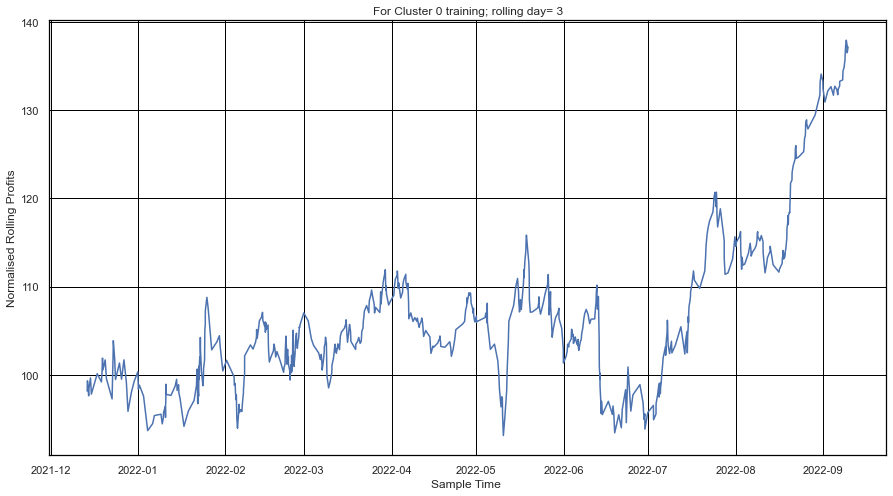

In [319]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 0 training; rolling day= 3")
plt.xlabel("Sample Time ")
plt.ylabel("Normalised Rolling Profits")
plt.plot(train0['Normalize Profit'])

In [324]:
test0= pd.DataFrame({'Time':pnl0_test_time, 'Final Cap':pnl0_test_norm})
test0.set_index('Time', inplace=True)
test0['Normalize Profit']=(1+test0['Final Cap'].pct_change()).cumprod()*100

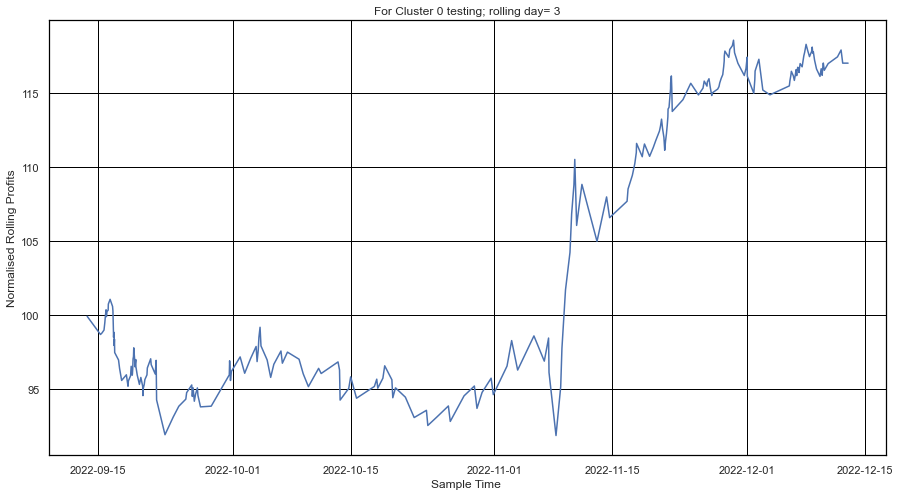

In [325]:
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.figure(figsize=(15,8))
plt.grid(True,axis='both',which= 'major',color='#000000')
plt.title("For Cluster 0 testing; rolling day= 3")
plt.xlabel("Sample Time ")
plt.ylabel("Normalised Rolling Profits")
plt.plot(test0['Normalize Profit'])

In [ ]:
(1+train0['Final Cap'].pct_change()).cumprod()*100

In [343]:
train0['Normalised '+coin0[0]]=(1+da_1.loc[pnl0_train_time][coin0[0]].pct_change()).cumprod()*100
train0['Normalised '+coin0[1]]=(1+da_1.loc[pnl0_train_time][coin0[1]].pct_change()).cumprod()*100

In [346]:
train0.fillna(method= 'bfill',inplace=True)
train0.head()

,Final Cap,Normalize Profit,Normalised UNI,Normalised MATIC
Time,,,,
2021-12-13 00:45:00,98305.171266,98.173388,90.942928,88.867835
2021-12-13 22:25:00,96509.517524,98.173388,90.942928,88.867835
2021-12-14 01:00:00,97633.852490,99.317107,87.468983,85.267646
2021-12-14 11:15:00,95967.174958,97.621696,87.841191,85.504500
2021-12-14 13:50:00,96802.493212,98.471415,89.578164,87.399337


<AxesSubplot:xlabel='Time'>

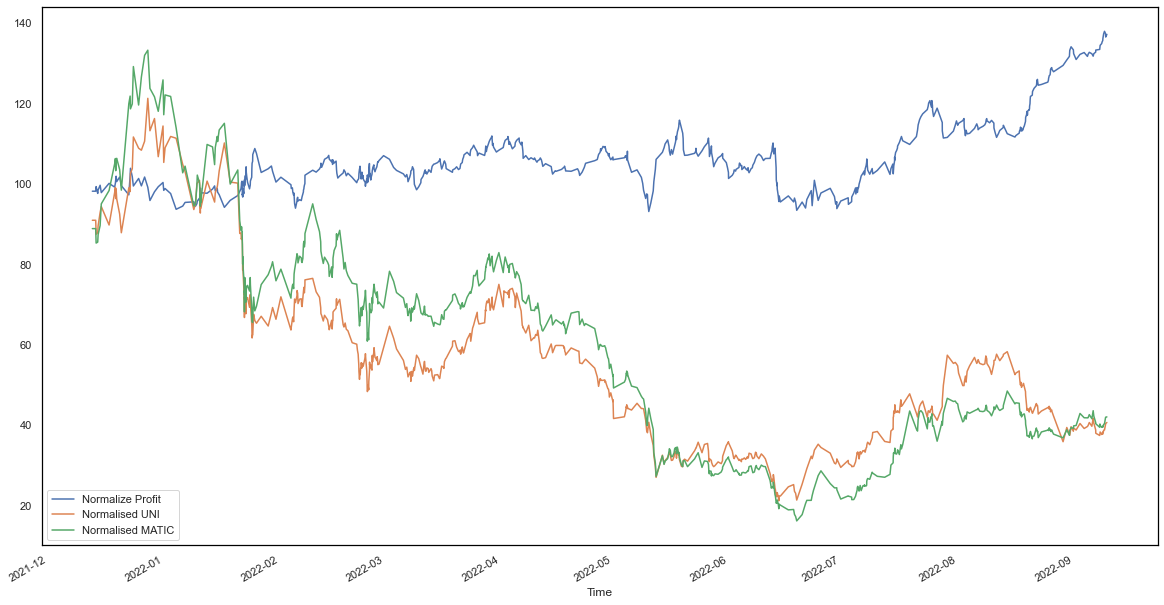

In [366]:
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
train0.plot(y=['Normalize Profit','Normalised UNI','Normalised MATIC'],figsize=(20,11),grid=True)
#plt.grid(True)

In [352]:
test0['Normalised '+coin0[0]]=(1+da_1.loc[pnl0_test_time][coin0[0]].pct_change()).cumprod()*100
test0['Normalised '+coin0[1]]=(1+da_1.loc[pnl0_test_time][coin0[1]].pct_change()).cumprod()*100

In [353]:
test0.fillna(method= 'bfill',inplace=True)
test0.head()

,Final Cap,Normalize Profit,Normalised UNI,Normalised MATIC
Time,,,,
2022-09-13 12:00:00,101160.810491,99.918864,96.582467,96.677454
2022-09-13 18:00:00,101078.732992,99.918864,96.582467,96.677454
2022-09-15 07:55:00,99836.422574,98.690809,89.747400,91.650485
2022-09-15 12:10:00,99940.823983,98.794013,91.233284,92.729234
2022-09-15 17:55:00,100140.398723,98.991297,91.381872,92.869471


<AxesSubplot:xlabel='Time'>

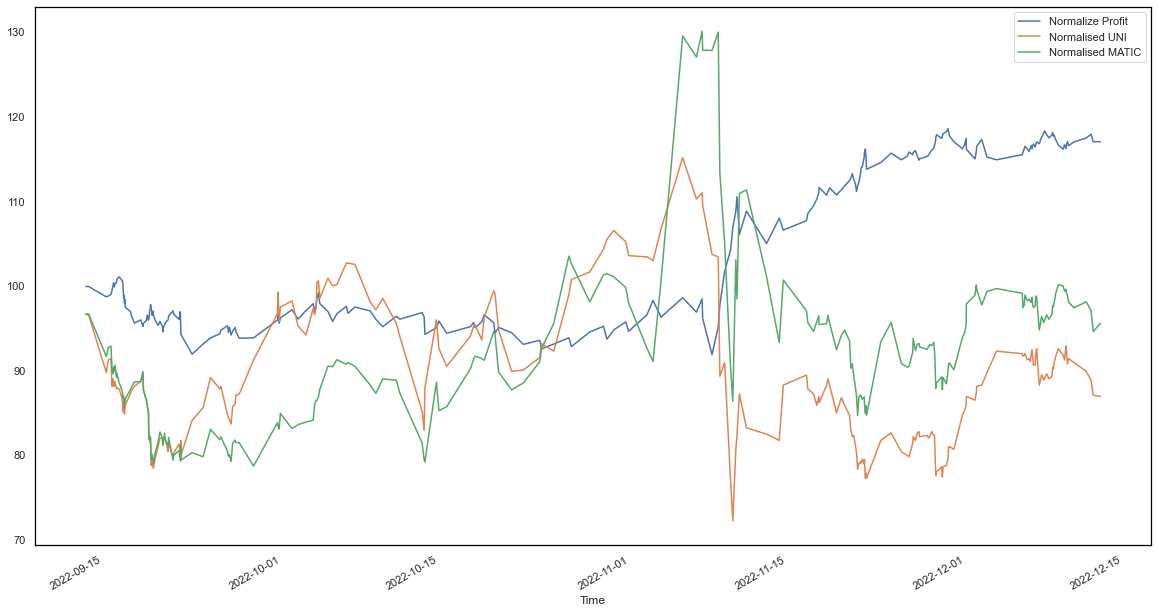

In [360]:
#plt.figure(figsize=(15,8))
#plt.grid(True,axis='both',which= 'major',color='#000000')
test0.plot(y=['Normalize Profit','Normalised UNI','Normalised MATIC'],figsize=(20,11),grid=True)
#plt.grid(True)